# Deep Learning and Uncertainty

Welcome to my new deep learning tutorial!
**In this notebook, you will**:
- Learn to perform semantic segmentation with a Deep Neural Network DNN
- See that the DNN's prediction are not reliable
- Try to robustify your DNN's predictions
If you have never used jupyter notebooks, nor Colab notebooks, [here](https://colab.research.google.com/notebooks/welcome.ipynb) is a short intro.


## I. PyTorch Tutorial

We will briefly go through the basics of the PyTorch package, playing with toy examples.

If you already know how to use PyTorch, you can go directly to the second part of this tutorial.

## II. Training a Deep Neural Network for semantic segmentation

In this part, we will train a Deep Neural Network to perform semantic segmentation.

## II. Analyzing the results and working on the uncertainty

In this part, we will test your  Deep Neural Network and see if the results are ok



# I. PyTorch Tutorial
First let us build a start by descovering PyTorch.
Let us start by importing the library.


In [ ]:
import torch
import numpy as np

We are now going to build our first Tensors.
In Pytorch everything is based on tensors, while in Numpy it is base on  arrays. There are similarities, but it is not the same thing!

In [ ]:
# different way to build a tensor
x = torch.empty(5, 3)
print('empty',x)
print(x.size()) # by doing x.size() can see the shape of tensor x
x = torch.rand(5, 3)
print('random',x)
x = torch.zeros(5, 3, dtype=torch.long) # you build a tensor with just zeros
print('zeros',x)
x = torch.tensor([5.5, 3]) # you build a tensor from an list
print('tensor',x)
x = torch.ones(10, 3) # you build a tensor with just ones
print('ones',x)
# override dtype!
x = torch.randn_like(x, dtype=torch.float)
print(x)

empty tensor([[2.8525e-32, 4.5338e-41, 2.8525e-32],
        [4.5338e-41, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.6816e-44],
        [6.7111e+22,        nan, 3.2512e-41],
        [3.3631e-44, 1.0635e-02, 1.8248e-32]])
torch.Size([5, 3])
random tensor([[0.6591, 0.0900, 0.9062],
        [0.7079, 0.4539, 0.6061],
        [0.8081, 0.8575, 0.9644],
        [0.4644, 0.0822, 0.7888],
        [0.0348, 0.9630, 0.5926]])
zeros tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
tensor tensor([5.5000, 3.0000])
ones tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[-0.5059, -1.1072,  0.5213],
        [ 0.0930,  0.1441,  0.3379],
        [-1.1083,  0.6376, -1.3434],
        [ 0.2387, -0.6016, -0.1709],
        [ 0.7706, -0.6902,  0.2744],
        [-1.4221,  1.

Now let us play with operations between tensors

In [ ]:
y = torch.rand(5, 3)
x = torch.ones(5, 3)
z=x + y
print(z)

tensor([[1.8281, 1.8247, 1.5473],
        [1.8730, 1.2085, 1.9126],
        [1.4554, 1.2358, 1.6977],
        [1.7225, 1.5614, 1.1840],
        [1.5999, 1.7758, 1.5985]])


In [ ]:
# here is 3 different ways to change the shape of x
print(x)
x0=x.view((3,5))
print('original shape of x',x.size(),'new shape',x0.size())
x1=x.view(-1)
print('original shape of x',x.size(),'new shape',x1.size())

x2=x.transpose(0, 1)
print('original shape of x',x.size(),'new shape',x2.size())

x3=x.reshape((3,5))
print('original shape of x',x.size(),'new shape',x3.size())

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
original shape of x torch.Size([5, 3]) new shape torch.Size([3, 5])
original shape of x torch.Size([5, 3]) new shape torch.Size([15])
original shape of x torch.Size([5, 3]) new shape torch.Size([3, 5])
original shape of x torch.Size([5, 3]) new shape torch.Size([3, 5])


From Pytorch to Numpy


In [ ]:
x=  torch.randn(4, 4)
print('the type of x is :',type(x))
xnumpy=x.numpy()
print('the type of xnumpy is :',type(xnumpy))

the type of x is : <class 'torch.Tensor'>
the type of xnumpy is : <class 'numpy.ndarray'>


In [ ]:
x2=torch.tensor([1.0])
print('the type of x is :',type(x2))
x2numpy=x2.numpy()
print('the type of xnumpy is :',type(x2numpy))
x2numpy=x2.item()
print('the type of xnumpy is :',type(x2numpy))

the type of x is : <class 'torch.Tensor'>
the type of xnumpy is : <class 'numpy.ndarray'>
the type of xnumpy is : <class 'float'>


**Q1/ why the next command do not work?**



In [ ]:
#y =xnumpy+x

# The command above does not work, because we are trying to add two different types. The solution is converting one of them to the other one's type.:
y = xnumpy + x.numpy()
#or
y = torch.tensor(xnumpy) + x

**Q2/ Please find a way to bring a = np.ones(5) to the GPU?**

In [ ]:
# Answer
a=np.ones(5)
print(a)
a=torch.from_numpy(a).cuda()
print(a)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], device='cuda:0', dtype=torch.float64)


# II. Training a Deep Neural Network for semantic segmentation

---



---

In the world of computer vision, having a strong grasp on using Deep Neural Networks (DNNs) for semantic segmentation is essential. This skill allows for meaningful information to be extracted from images by classifying each pixel and assigning it a specific label based on its corresponding object or region. Despite its proficiency, the use of DNNs for semantic segmentation can present challenges in practical applications where their predictions are not always accurate or reliable. This unreliability, which can result in misclassifications or uncertainties, creates barriers for implementing these models in important fields where precision is crucial.

To address these challenges, it is not enough to achieve accurate segmentation; instead, the focus shifts towards enhancing the robustness of DNN predictions. Robustness involves fortifying the model by attacking class imbalance and integrating dropout layers into the neural networks to alleviate the burden on some neurons in image segmentation.

Now let us perform a semantic segmentation DNN. We will first build a datasetloader and then train the DNN.


In [ ]:
# here are the training parameters
batch_size = 10
learning_rate =1e-3
weight_decay=2e-4
lr_decay_epochs=20
lr_decay=0.1
nb_epochs=50

Please download the [camvid](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/) dataset and put it in your google cloud  here is the link https://drive.google.com/drive/folders/1HBj97T5aO-NoAEnUy_GfaS1fK5Epf0W2?usp=sharing

## A. building the dataset
Please note that we set as background the car, the bicyclist and pedestrian. So the CNN never see these classes.

In [ ]:
import os

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torch.utils.data as data
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from PIL import Image

from google.colab import drive


In [ ]:
# First you download the camvid dataset from the link (wwwww ) and you put it in your google colab
# Then let us mount you google drive
drive.mount('/drive')


Mounted at /drive


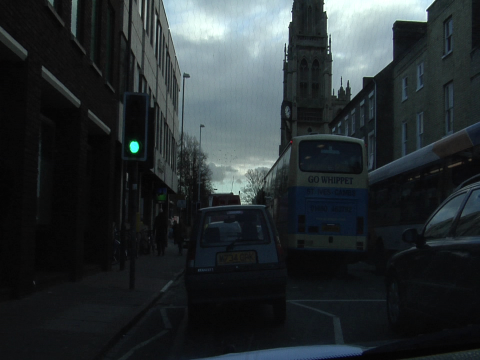

In [ ]:
#
#  Please check that you can read an image  from camvid dataset
PATH_data = '/drive/My Drive/Colab Notebooks/IA323/CamVid'

im = Image.open(PATH_data+"/train/0001TP_006690.png")
im

 here is a set of utils function for the dataset and the evaluation

In [ ]:
import os

from collections import OrderedDict
import torch.utils.data as data
import numpy as np
from torchvision.transforms import ToPILImage

def get_files(folder, name_filter=None, extension_filter=None):
    """Helper function that returns the list of files in a specified folder
    with a specified extension.

    Keyword arguments:
    - folder (``string``): The path to a folder.
    - name_filter (```string``, optional): The returned files must contain
    this substring in their filename. Default: None; files are not filtered.
    - extension_filter (``string``, optional): The desired file extension.
    Default: None; files are not filtered

    """
    if not os.path.isdir(folder):
        raise RuntimeError("\"{0}\" is not a folder.".format(folder))

    # Filename filter: if not specified don't filter (condition always true);
    # otherwise, use a lambda expression to filter out files that do not
    # contain "name_filter"
    if name_filter is None:
        # This looks hackish...there is probably a better way
        name_cond = lambda filename: True
    else:
        name_cond = lambda filename: name_filter in filename

    # Extension filter: if not specified don't filter (condition always true);
    # otherwise, use a lambda expression to filter out files whose extension
    # is not "extension_filter"
    if extension_filter is None:
        # This looks hackish...there is probably a better way
        ext_cond = lambda filename: True
    else:
        ext_cond = lambda filename: filename.endswith(extension_filter)

    filtered_files = []

    # Explore the directory tree to get files that contain "name_filter" and
    # with extension "extension_filter"
    for path, _, files in os.walk(folder):
        files.sort()
        for file in files:
            if name_cond(file) and ext_cond(file):
                full_path = os.path.join(path, file)
                filtered_files.append(full_path)

    return filtered_files


def pil_loader(data_path, label_path):
    """Loads a sample and label image given their path as PIL images.

    Keyword arguments:
    - data_path (``string``): The filepath to the image.
    - label_path (``string``): The filepath to the ground-truth image.

    Returns the image and the label as PIL images.

    """
    data = Image.open(data_path)
    label = Image.open(label_path)

    return data, label

def batch_transform(batch, transform):
    """Applies a transform to a batch of samples.

    Keyword arguments:
    - batch (): a batch os samples
    - transform (callable): A function/transform to apply to ``batch``

    """

    # Convert the single channel label to RGB in tensor form
    # 1. torch.unbind removes the 0-dimension of "labels" and returns a tuple of
    # all slices along that dimension
    # 2. the transform is applied to each slice
    transf_slices = [transform(tensor) for tensor in torch.unbind(batch)]

    return torch.stack(transf_slices)

def remap(image, old_values, new_values):
    assert isinstance(image, Image.Image) or isinstance(
        image, np.ndarray), "image must be of type PIL.Image or numpy.ndarray"
    assert type(new_values) is tuple, "new_values must be of type tuple"
    assert type(old_values) is tuple, "old_values must be of type tuple"
    assert len(new_values) == len(
        old_values), "new_values and old_values must have the same length"

    # If image is a PIL.Image convert it to a numpy array
    if isinstance(image, Image.Image):
        image = np.array(image)

    # Replace old values by the new ones
    tmp = np.zeros_like(image)
    for old, new in zip(old_values, new_values):
        # Since tmp is already initialized as zeros we can skip new values
        # equal to 0
        if new != 0:
            tmp[image == old] = new

    return Image.fromarray(tmp)


def enet_weighing(dataloader, num_classes, c=1.02):
    """Computes class weights as described in the ENet paper:

        w_class = 1 / (ln(c + p_class)),

    where c is usually 1.02 and p_class is the propensity score of that
    class:

        propensity_score = freq_class / total_pixels.

    References: https://arxiv.org/abs/1606.02147

    Keyword arguments:
    - dataloader (``data.Dataloader``): A data loader to iterate over the
    dataset.
    - num_classes (``int``): The number of classes.
    - c (``int``, optional): AN additional hyper-parameter which restricts
    the interval of values for the weights. Default: 1.02.

    """

    print(dataloader)
    class_count = 0
    total = 0
    for _, label in dataloader:
      label = label.cpu().numpy()
      # Flatten label
      flat_label = label.flatten()

      # Sum up the number of pixels of each class and the total pixel
      # counts for each label
      class_count += np.bincount(flat_label, minlength=num_classes)
      total += flat_label.size

    # Compute propensity score and then the weights for each class
    propensity_score = class_count / total
    class_weights = 1 / (np.log(c + propensity_score))

    return class_weights





class PILToLongTensor(object):
    """Converts a ``PIL Image`` to a ``torch.LongTensor``.
    Code adapted from: http://pytorch.org/docs/master/torchvision/transforms.html?highlight=totensor
    """

    def __call__(self, pic):
        """Performs the conversion from a ``PIL Image`` to a ``torch.LongTensor``.
        Keyword arguments:
        - pic (``PIL.Image``): the image to convert to ``torch.LongTensor``
        Returns:
        A ``torch.LongTensor``.
        """
        if not isinstance(pic, Image.Image):
            raise TypeError("pic should be PIL Image. Got {}".format(
                type(pic)))

        # handle numpy array
        if isinstance(pic, np.ndarray):
            img = torch.from_numpy(pic.transpose((2, 0, 1)))
            # backward compatibility
            return img.long()

        # Convert PIL image to ByteTensor
        img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))

        # Reshape tensor
        nchannel = len(pic.mode)
        img = img.view(pic.size[1], pic.size[0], nchannel)

        # Convert to long and squeeze the channels
        return img.transpose(0, 1).transpose(0,
                                             2).contiguous().long().squeeze_()


class LongTensorToRGBPIL(object):
    """Converts a ``torch.LongTensor`` to a ``PIL image``.
    The input is a ``torch.LongTensor`` where each pixel's value identifies the
    class.
    Keyword arguments:
    - rgb_encoding (``OrderedDict``): An ``OrderedDict`` that relates pixel
    values, class names, and class colors.
    """
    def __init__(self, rgb_encoding):
        self.rgb_encoding = rgb_encoding

    def __call__(self, tensor):
        """Performs the conversion from ``torch.LongTensor`` to a ``PIL image``
        Keyword arguments:
        - tensor (``torch.LongTensor``): the tensor to convert
        Returns:
        A ``PIL.Image``.
        """
        # Check if label_tensor is a LongTensor
        if not isinstance(tensor, torch.LongTensor):
            raise TypeError("label_tensor should be torch.LongTensor. Got {}"
                            .format(type(tensor)))
        # Check if encoding is a ordered dictionary
        if not isinstance(self.rgb_encoding, OrderedDict):
            raise TypeError("encoding should be an OrderedDict. Got {}".format(
                type(self.rgb_encoding)))

        # label_tensor might be an image without a channel dimension, in this
        # case unsqueeze it
        if len(tensor.size()) == 2:
            tensor.unsqueeze_(0)

        color_tensor = torch.ByteTensor(3, tensor.size(1), tensor.size(2))

        for index, (class_name, color) in enumerate(self.rgb_encoding.items()):
            # Get a mask of elements equal to index
            mask = torch.eq(tensor, index).squeeze_()
            # Fill color_tensor with corresponding colors
            for channel, color_value in enumerate(color):
                color_tensor[channel].masked_fill_(mask, color_value)

        return ToPILImage()(color_tensor)

## B building the Dataloader

**Q3/ please study the dataset a bit. What it is about?**

Plot images, have a look at the information link to camvid dataset

The dataset CamVid (Cambridge-driving Labeled Video Database) is a road/driving scene understanding database. He consists of the train set, validation set and test set. The train set is a set of 367 images used to train the model, the validation set is a set of 101 images used to validate the prediction of the trained model and the test set is a set of 233 images used to test the model. The images are normalized in 360 pixels high and 480 pixels wide. It is worth noting that, in this dataset, an image is segmented into pixels that can belong to 13 possible classes (sky, building, pole, road marking, road, pavement, tree, sign symbol, fence, car,pedestrian, bicyclist and unlabeled), each one with a different color. These classes are defined in the **class_encoding** dictionary. During model training, the model must learn to correctly associate each pixel with the correct class.

### **Pre-training**

To make the data ready for training, we implemented a size adjustment to standardize the images and separated the training, validation and test sets. In addition, the weights of each class were calculated to address class imbalance in training data for the semantic segmentation based on the ENet paper defined as:

\begin{equation}
w_{class} = \frac{1}{ln(c+p_{class})}
\end{equation}

Where c is an additional hyper-parameter set forth in 1.02, which restricts the interval of values for the weights and $p_{class}$ is the propensity score of that class calculated as the division of the class frequency over the total pixels.

In [ ]:
class CamVid(data.Dataset):
    """CamVid dataset loader where the dataset is arranged as in
    https://github.com/alexgkendall/SegNet-Tutorial/tree/master/CamVid.


    Keyword arguments:
    - root_dir (``string``): Root directory path.
    - mode (``string``): The type of dataset: 'train' for training set, 'val'
    for validation set, and 'test' for test set.
    - transform (``callable``, optional): A function/transform that  takes in
    an PIL image and returns a transformed version. Default: None.
    - label_transform (``callable``, optional): A function/transform that takes
    in the target and transforms it. Default: None.
    - loader (``callable``, optional): A function to load an image given its
    path. By default ``default_loader`` is used.

    """
    # Training dataset root folders
    train_folder = 'train'
    train_lbl_folder = 'trainannot'

    # Validation dataset root folders
    val_folder = 'val'
    val_lbl_folder = 'valannot'

    # Test dataset root folders
    test_folder = 'test'
    test_lbl_folder = 'testannot'

    # Images extension
    img_extension = '.png'

    # Default encoding for pixel value, class name, and class color
    color_encoding = OrderedDict([
        ('sky', (128, 128, 128)),
        ('building', (128, 0, 0)),
        ('pole', (192, 192, 128)),
        ('road_marking', (255, 69, 0)),
        ('road', (128, 64, 128)),
        ('pavement', (60, 40, 222)),
        ('tree', (128, 128, 0)),
        ('sign_symbol', (192, 128, 128)),
        ('fence', (64, 64, 128)),
        ('car', (64, 0, 128)),
        ('pedestrian', (64, 64, 0)),
        ('bicyclist', (0, 128, 192)),
        ('unlabeled', (0, 0, 0))
    ])

    # Constructor needed to know what is entering the class
    def __init__(self,
                 root_dir,
                 mode='train',
                 transform=None,
                 label_transform=None,
                 loader=pil_loader):
        self.root_dir = root_dir
        self.mode = mode
        self.transform = transform
        self.label_transform = label_transform
        self.loader = loader

        # str.lower() to convert a string to all lowercase characters
        if self.mode.lower() == 'train':
            # Get the training data and labels filepaths
            self.train_data = get_files(
                os.path.join(root_dir, self.train_folder),
                extension_filter=self.img_extension)

            self.train_labels = get_files(
                os.path.join(root_dir, self.train_lbl_folder),
                extension_filter=self.img_extension)
        elif self.mode.lower() == 'val':
            # Get the validation data and labels filepaths
            self.val_data = get_files(
                os.path.join(root_dir, self.val_folder),
                extension_filter=self.img_extension)

            self.val_labels = get_files(
                os.path.join(root_dir, self.val_lbl_folder),
                extension_filter=self.img_extension)
        elif self.mode.lower() == 'test':
            # Get the test data and labels filepaths
            self.test_data = get_files(
                os.path.join(root_dir, self.test_folder),
                extension_filter=self.img_extension)

            self.test_labels = get_files(
                os.path.join(root_dir, self.test_lbl_folder),
                extension_filter=self.img_extension)
        else:
            raise RuntimeError("Unexpected dataset mode. "
                               "Supported modes are: train, val and test")

    def __getitem__(self, index):
        """
        Args:
        - index (``int``): index of the item in the dataset

        Returns:
        A tuple of ``PIL.Image`` (image, label) where label is the ground-truth
        of the image.

        """
        if self.mode.lower() == 'train':
            data_path, label_path = self.train_data[index], self.train_labels[
                index]
        elif self.mode.lower() == 'val':
            data_path, label_path = self.val_data[index], self.val_labels[
                index]
        elif self.mode.lower() == 'test':
            data_path, label_path = self.test_data[index], self.test_labels[
                index]
        else:
            raise RuntimeError("Unexpected dataset mode. "
                               "Supported modes are: train, val and test")

        img, label = self.loader(data_path, label_path)

        if self.transform is not None:
            img = self.transform(img)

        if self.label_transform is not None:
            label = self.label_transform(label)

        return img, label

    def __len__(self):
        """Returns the length of the dataset."""
        if self.mode.lower() == 'train':
            return len(self.train_data)
        elif self.mode.lower() == 'val':
            return len(self.val_data)
        elif self.mode.lower() == 'test':
            return len(self.test_data)
        else:
            raise RuntimeError("Unexpected dataset mode. "
                               "Supported modes are: train, val and test")



In [ ]:
print("\nLoading dataset...\n")
print("Dataset directory:", PATH_data)
#print("Save directory:", save_dir)

# .Compose: List of transforms(.ToTensor: Convert a PIL Image or ndarray to tensor)
image_transform = transforms.Compose(
        [transforms.Resize((360, 480)),
         transforms.ToTensor()])

# .NEAREST: Pick one nearest pixel from the input image. Ignore all other input pixels.
label_transform = transforms.Compose([
        transforms.Resize((360, 480), Image.NEAREST),
        PILToLongTensor()
    ])

image_transform_test = transforms.Compose(
        [transforms.Resize((360, 480)),
         transforms.ToTensor()])

# Get selected dataset
# Load the training set as tensors
train_set = CamVid(
        PATH_data,
        transform=image_transform,
        label_transform=label_transform)

#DataLoader: Combines a dataset and a sampler, and provides an iterable over the given dataset.
train_loader = data.DataLoader(
        train_set,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4)
#shuffle: set to True to have the data reshuffled at every epoch
# num_workers: how many subprocesses to use for data loading

# Load the validation set as tensors
val_set = CamVid(
        PATH_data,
        mode='val',
        transform=image_transform,
        label_transform=label_transform)
val_loader = data.DataLoader(
        val_set,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4)

# Load the test set as tensors
test_set = CamVid(
        PATH_data,
        mode='test',
        transform=image_transform_test,
        label_transform=label_transform)
test_loader = data.DataLoader(
        test_set,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4)

# Get encoding between pixel valus in label images and RGB colors
class_encoding = train_set.color_encoding
print('class_encoding  >>>>>', class_encoding)
# Remove the road_marking class from the CamVid dataset as it's merged
# with the road class
#del class_encoding['road_marking']

# Get number of classes to predict
num_classes = len(class_encoding)

# Print information for debugging
print("Number of classes to predict:", num_classes)
print("Train dataset size:", len(train_set))
print("Validation dataset size:", len(val_set))

# Get a batch of samples to display

images, labels = next(iter(test_loader))#iter(test_loader).next()
print("Image size:", images.size())
print("Label size:", labels.size())
print("Class-color encoding:", class_encoding)


# Get class weights from the selected weighing technique
print("\nComputing class weights...")
print("(this can take a while depending on the dataset size)")

class_weights = enet_weighing(train_loader, num_classes)

class_weights = torch.from_numpy(class_weights).float().cuda()
# Set the weight of the unlabeled class to 0

ignore_index = list(class_encoding).index('unlabeled')
class_weights[ignore_index] = 0
ignore_index = list(class_encoding).index('pedestrian')
class_weights[ignore_index] = 0
ignore_index = list(class_encoding).index('bicyclist')
class_weights[ignore_index] = 0
ignore_index = list(class_encoding).index('car')
class_weights[ignore_index] = 0

print("Class weights:", class_weights)


Loading dataset...

Dataset directory: /drive/My Drive/Colab Notebooks/IA323/CamVid
class_encoding  >>>>> OrderedDict([('sky', (128, 128, 128)), ('building', (128, 0, 0)), ('pole', (192, 192, 128)), ('road_marking', (255, 69, 0)), ('road', (128, 64, 128)), ('pavement', (60, 40, 222)), ('tree', (128, 128, 0)), ('sign_symbol', (192, 128, 128)), ('fence', (64, 64, 128)), ('car', (64, 0, 128)), ('pedestrian', (64, 64, 0)), ('bicyclist', (0, 128, 192)), ('unlabeled', (0, 0, 0))])
Number of classes to predict: 13
Train dataset size: 367
Validation dataset size: 101


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

Image size: torch.Size([10, 3, 360, 480])
Label size: torch.Size([10, 360, 480])
Class-color encoding: OrderedDict([('sky', (128, 128, 128)), ('building', (128, 0, 0)), ('pole', (192, 192, 128)), ('road_marking', (255, 69, 0)), ('road', (128, 64, 128)), ('pavement', (60, 40, 222)), ('tree', (128, 128, 0)), ('sign_symbol', (192, 128, 128)), ('fence', (64, 64, 128)), ('car', (64, 0, 128)), ('pedestrian', (64, 64, 0)), ('bicyclist', (0, 128, 192)), ('unlabeled', (0, 0, 0))])

Computing class weights...
(this can take a while depending on the dataset size)


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

Class weights: tensor([ 5.7920,  4.4403, 34.0217,  3.4469, 15.9119,  9.0202, 32.0138, 32.4789,
        13.2071,  0.0000,  0.0000,  0.0000,  0.0000], device='cuda:0')


**Q4/ why do we need to evaluate the class_weights?**

The class_weights is used to address class imbalance in the training data. So, we need to evaluate this class, because they can be used during model training to give more importance to less frequent classes. In this way, to reduce bias,  we give higher weights to those who are minorities and, then, the model gives adequate attention to all classes, even those that may have a smaller representation in the dataset. Thus, the model is encouraged to learn all classes, including those that may be rare in train set.

If the weights of the classes are not evaluated, the model can focus more on the more frequent classes and, thus, the less frequent ones are ignored during training.

## C. building the DNN

### **Neural network architecture**

The neural network implemented is UNet with some modifications. The UNet architecture consists of a contracting path to capture context and a symmetric expanding path that enables precise localization.

![](https://drive.google.com/file/d/1BTPsAJ5eBHQJDdJBesPv1-FebVHTwAh-/view?usp=sharing)


**Q5/ Do we really use Unet? What did I change :)? (that is hard)**

We use a UNet, but it has been modified. One of the changes is the use of Dropout after each upsample layer. Dropout is a regularization technique that involves "turning off" random neurons during training to avoid overfitting. In the code presented, the Dropout rate used is 0.1, i.e. 10% of the neurons are randomly "turned off". In addition, the UNet is adapted to have 3 input channels, since the input images are RGB color.


**Q6/Why Unet is a bad idea for our task?**

UNet was originally developed for biomedical image segmentation. Therefore, UNet is not a good idea for our application. One reason is that our task contains a wide variety of classes, so the UNet network may struggle to learn effective representations for all of them. Furthermore, if there is a significant imbalance between the classes, the UNet may favor the dominant classes, necessitating the implementation of balancing strategies, as implemented above.

In addition, the UNet architecture achieves very good performance thanks to data augmentation with elastic deformation which we do not apply.


**Q7/Why Did Gianni Choose Unet?**

As UNet was initially developed for biomedical image segmentation, it is capable of capturing fine details and dealing with different scales and resolutions due to its downsampling and upsampling mechanism and its skip connection to avoid the loss of edge pixels at each convolution.. In this way, this network is able to perform more accurate the segmentation. UNet is also effective with a limited train set and hardware, especially with the Dropout technique applied.

In addition, UNet is a relatively simple and easy-to-understand architecture, and you can adapt the number of input channels according to your application. It was originally implemented for biomedical image segmentation, so it usually has just one channel. However, as the number of input channels is adaptable, we can have 3 channels for RBG color images as input (which is our case).


In [ ]:

__all__ = ["UNet"]


class double_conv(nn.Module):
    '''(conv => BN => ReLU) * 2'''

    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x


class inconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(inconv, self).__init__()
        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x):
        x = self.conv(x)
        return x


class down(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(down, self).__init__()
        self.mpconv = nn.Sequential(
            nn.MaxPool2d(2),
            double_conv(in_ch, out_ch)
        )

    def forward(self, x):
        x = self.mpconv(x)
        return x


class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()
        self.bilinear = bilinear

        self.up = nn.ConvTranspose2d(in_ch // 2, in_ch // 2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2):
        if self.bilinear:
            x1 = F.interpolate(x1, scale_factor=2, mode='bilinear', align_corners=True)
        else:
            x1 = self.up(x1)

        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])

        # for padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd

        x = torch.cat([x2, x1], dim=1)
        x = self.conv(x)
        return x


class outconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(outconv, self).__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, 1)

    def forward(self, x):
        x = self.conv(x)
        return x

#please note that we have added dropout layer to be abble to use MC dropout
# Dropout layer: During training, randomly zeroes some of the elements of the input tensor with probability 0.1 using samples from a Bernoulli distribution.

class UNet(nn.Module):
    def __init__(self, classes):
        super(UNet, self).__init__()
        self.inc = inconv(3, 32)
        self.down1 = down(32, 64)
        self.down2 = down(64, 128)
        self.down3 = down(128, 256)
        self.down4 = down(256, 256)
        self.up1 = up(512, 128)
        self.up2 = up(256, 64)
        self.up3 = up(128, 32)
        self.up4 = up(64, 32)
        self.outc = outconv(32, classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = F.dropout2d(x, 0.1, training=self.training)
        x = self.up2(x, x3)
        x = F.dropout2d(x, 0.1, training=self.training)
        x = self.up3(x, x2)
        x = F.dropout2d(x, 0.1, training=self.training)
        x = self.up4(x, x1)
        x = F.dropout2d(x, 0.1, training=self.training)
        x = self.outc(x)

        return x

## D. Utility functions

### Metrics

In [ ]:
class Metric(object):
    """Base class for all metrics.
    From: https://github.com/pytorch/tnt/blob/master/torchnet/meter/meter.py
    """
    def reset(self):
        pass

    def add(self):
        pass

    def value(self):
        pass

class ConfusionMatrix(Metric):
    """Constructs a confusion matrix for a multi-class classification problems.
    Does not support multi-label, multi-class problems.
    Keyword arguments:
    - num_classes (int): number of classes in the classification problem.
    - normalized (boolean, optional): Determines whether or not the confusion
    matrix is normalized or not. Default: False.
    Modified from: https://github.com/pytorch/tnt/blob/master/torchnet/meter/confusionmeter.py
    """

    def __init__(self, num_classes, normalized=False):
        super().__init__()

        self.conf = np.ndarray((num_classes, num_classes), dtype=np.int32)
        self.normalized = normalized
        self.num_classes = num_classes
        self.reset()

    def reset(self):
        self.conf.fill(0)

    def add(self, predicted, target):
        """Computes the confusion matrix
        The shape of the confusion matrix is K x K, where K is the number
        of classes.
        Keyword arguments:
        - predicted (Tensor or numpy.ndarray): Can be an N x K tensor/array of
        predicted scores obtained from the model for N examples and K classes,
        or an N-tensor/array of integer values between 0 and K-1.
        - target (Tensor or numpy.ndarray): Can be an N x K tensor/array of
        ground-truth classes for N examples and K classes, or an N-tensor/array
        of integer values between 0 and K-1.
        """
        # If target and/or predicted are tensors, convert them to numpy arrays
        if torch.is_tensor(predicted):
            predicted = predicted.cpu().numpy()
        if torch.is_tensor(target):
            target = target.cpu().numpy()

        assert predicted.shape[0] == target.shape[0], \
            'number of targets and predicted outputs do not match'

        if np.ndim(predicted) != 1:
            assert predicted.shape[1] == self.num_classes, \
                'number of predictions does not match size of confusion matrix'
            predicted = np.argmax(predicted, 1)
        else:
            assert (predicted.max() < self.num_classes) and (predicted.min() >= 0), \
                'predicted values are not between 0 and k-1'

        if np.ndim(target) != 1:
            assert target.shape[1] == self.num_classes, \
                'Onehot target does not match size of confusion matrix'
            assert (target >= 0).all() and (target <= 1).all(), \
                'in one-hot encoding, target values should be 0 or 1'
            assert (target.sum(1) == 1).all(), \
                'multi-label setting is not supported'
            target = np.argmax(target, 1)
        else:
            assert (target.max() < self.num_classes) and (target.min() >= 0), \
                'target values are not between 0 and k-1'

        # hack for bincounting 2 arrays together
        x = predicted + self.num_classes * target
        bincount_2d = np.bincount(
            x.astype(np.int32), minlength=self.num_classes**2)
        assert bincount_2d.size == self.num_classes**2
        conf = bincount_2d.reshape((self.num_classes, self.num_classes))

        self.conf += conf

    def value(self):
        """
        Returns:
            Confustion matrix of K rows and K columns, where rows corresponds
            to ground-truth targets and columns corresponds to predicted
            targets.
        """
        if self.normalized:
            conf = self.conf.astype(np.float32)
            return conf / conf.sum(1).clip(min=1e-12)[:, None]
        else:
            return self.conf



class IoU(Metric):
    """Computes the intersection over union (IoU) per class and corresponding
    mean (mIoU).
    Intersection over union (IoU) is a common evaluation metric for semantic
    segmentation. The predictions are first accumulated in a confusion matrix
    and the IoU is computed from it as follows:
        IoU = true_positive / (true_positive + false_positive + false_negative).
    Keyword arguments:
    - num_classes (int): number of classes in the classification problem
    - normalized (boolean, optional): Determines whether or not the confusion
    matrix is normalized or not. Default: False.
    - ignore_index (int or iterable, optional): Index of the classes to ignore
    when computing the IoU. Can be an int, or any iterable of ints.
    """

    def __init__(self, num_classes, normalized=False, ignore_index=None):
        super().__init__()
        self.conf_metric = ConfusionMatrix(num_classes, normalized)

        if ignore_index is None:
            self.ignore_index = None
        elif isinstance(ignore_index, int):
            self.ignore_index = (ignore_index,)
        else:
            try:
                self.ignore_index = tuple(ignore_index)
            except TypeError:
                raise ValueError("'ignore_index' must be an int or iterable")

    def reset(self):
        self.conf_metric.reset()

    def add(self, predicted, target):
        """Adds the predicted and target pair to the IoU metric.
        Keyword arguments:
        - predicted (Tensor): Can be a (N, K, H, W) tensor of
        predicted scores obtained from the model for N examples and K classes,
        or (N, H, W) tensor of integer values between 0 and K-1.
        - target (Tensor): Can be a (N, K, H, W) tensor of
        target scores for N examples and K classes, or (N, H, W) tensor of
        integer values between 0 and K-1.
        """
        # Dimensions check
        assert predicted.size(0) == target.size(0), \
            'number of targets and predicted outputs do not match'
        assert predicted.dim() == 3 or predicted.dim() == 4, \
            "predictions must be of dimension (N, H, W) or (N, K, H, W)"
        assert target.dim() == 3 or target.dim() == 4, \
            "targets must be of dimension (N, H, W) or (N, K, H, W)"

        # If the tensor is in categorical format convert it to integer format
        if predicted.dim() == 4:
            _, predicted = predicted.max(1)
        if target.dim() == 4:
            _, target = target.max(1)

        self.conf_metric.add(predicted.view(-1), target.view(-1))

    def value(self):
        """Computes the IoU and mean IoU.
        The mean computation ignores NaN elements of the IoU array.
        Returns:
            Tuple: (IoU, mIoU). The first output is the per class IoU,
            for K classes it's numpy.ndarray with K elements. The second output,
            is the mean IoU.
        """
        conf_matrix = self.conf_metric.value()
        if self.ignore_index is not None:
            for index in self.ignore_index:
                conf_matrix[:, self.ignore_index] = 0
                conf_matrix[self.ignore_index, :] = 0
        true_positive = np.diag(conf_matrix)
        false_positive = np.sum(conf_matrix, 0) - true_positive
        false_negative = np.sum(conf_matrix, 1) - true_positive

        # Just in case we get a division by 0, ignore/hide the error
        with np.errstate(divide='ignore', invalid='ignore'):
            iou = true_positive / (true_positive + false_positive + false_negative)

        return iou, np.nanmean(iou)

In [ ]:
# Colors from Colorbrewer Paired_12
colors = [[31, 120, 180], [51, 160, 44]]
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]

def plot_losses(train_history, val_history):
    x = np.arange(1, len(train_history) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(x, train_history, color=colors[0], label="Training loss", linewidth=2)
    plt.plot(x, val_history, color=colors[1], label="Validation loss", linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title("Evolution of the training and validation loss")
    plt.show()

def plot_accu(train_history, val_history):
    x = np.arange(1, len(train_history) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(x, train_history, color=colors[0], label="Training miou", linewidth=2)
    plt.plot(x, val_history, color=colors[1], label="Validation miou", linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title("Evolution of the training and validation loss")
    plt.show()

**Q8/  what is the IoU?**

Intersection over Union (IoU) is, for two sets, the ratio of their intersection area to their union area. In other words, IoU provides a measure of how well a predicted object aligns with the ground-truth object. It ranges from 0 (if they do not correspod at all) to 1 (if they fully correspond). A higher IoU value indicates a better alignment between the predicted and the ground-truth regions, reflecting a more accurate model.

### Training function

In [ ]:
def train( model, data_loader, optim, criterion, metric,iteration_loss=False):
    model.train()
    epoch_loss = 0.0
    metric.reset()
    for step, batch_data in enumerate(data_loader):
        # Get the inputs and labels
        inputs = batch_data[0].cuda()
        labels = batch_data[1].cuda()

        # Forward propagation
        outputs = model(inputs)

        # Loss computation
        loss = criterion(outputs, labels)

        # Backpropagation
        optim.zero_grad()
        loss.backward()
        optim.step()

        # Keep track of loss for current epoch
        epoch_loss += loss.item()

        # Keep track of the evaluation metric
        metric.add(outputs.detach(), labels.detach())

        if iteration_loss:
            print("[Step: %d] Iteration loss: %.4f" % (step, loss.item()))

    return epoch_loss / len(data_loader), metric.value()

### Validation function

In [ ]:
def test(model, data_loader, criterion, metric, iteration_loss=False):
    model.eval()
    epoch_loss = 0.0
    metric.reset()
    for step, batch_data in enumerate(data_loader):
        # Get the inputs and labels
        inputs = batch_data[0].cuda()
        labels = batch_data[1].cuda()

        with torch.no_grad():
            # Forward propagation
            outputs = model(inputs)

            # Loss computation
            loss = criterion(outputs, labels)

        # Keep track of loss for current epoch
        epoch_loss += loss.item()

        # Keep track of evaluation the metric
        metric.add(outputs.detach(), labels.detach())

        if iteration_loss:
            print("[Step: %d] Iteration loss: %.4f" % (step, loss.item()))

    return epoch_loss / len(data_loader), metric.value()

## E. Training Process

**Q9/ please train your DNN and comment?**

In [ ]:
print("\nTraining...\n")
num_classes = len(class_encoding)
# Intialize UNet
model = UNet(num_classes).cuda()


# We are going to use the CrossEntropyLoss loss function as it's most
# frequentely used in classification problems with multiple classes which
# fits the problem. This criterion  combines LogSoftMax and NLLLoss.
criterion = nn.CrossEntropyLoss(weight=class_weights)

# We build the optimizer
optimizer = optim.Adam(
        model.parameters(),
        lr=learning_rate,
        weight_decay=weight_decay)

# Learning rate decay scheduler
lr_updater = lr_scheduler.StepLR(optimizer, lr_decay_epochs,
                                     lr_decay)

# Evaluation metric
ignore_index=[]
ignore_index0 = list(class_encoding).index('unlabeled')
ignore_index.append(ignore_index0)
ignore_index0 = list(class_encoding).index('pedestrian')
ignore_index.append(ignore_index0)
ignore_index0 = list(class_encoding).index('bicyclist')
ignore_index.append(ignore_index0)
ignore_index0 = list(class_encoding).index('car')
ignore_index.append(ignore_index0)

metric = IoU(num_classes, ignore_index=ignore_index)


Training...



NameError: name 'class_encoding' is not defined

In [ ]:
######################################################
######## NEEDS TO SET TO TRUE TO TRAIN AGAIN #########
######################################################
run_training = True

if run_training:
  # Start Training
  best_miou = 0
  train_loss_history = []
  val_loss_history = []
  train_miou_history = []
  val_miou_history = []
  for epoch in range( nb_epochs):
    print(">>>> [Epoch: {0:d}] Training".format(epoch))

    epoch_loss, (iou, miou) = train( model, train_loader, optimizer, criterion, metric)
    lr_updater.step()
    print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, epoch_loss, miou))
    train_miou=miou
    train_loss=epoch_loss
    if (epoch + 1) % 5 == 0 or epoch + 1 == nb_epochs:

      print(">>>> [Epoch: {0:d}] Validation".format(epoch))
      loss, (iou, miou) = test(model, val_loader, criterion, metric)
      print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, loss, miou))
      train_loss_history.append(train_loss)
      val_loss_history.append(loss)
      train_miou_history.append(train_miou)
      val_miou_history.append(miou)
      # Print per class IoU on last epoch or if best iou
      if epoch + 1 == nb_epochs or miou > best_miou:
        for key, class_iou in zip(class_encoding.keys(), iou):
          print("{0}: {1:.4f}".format(key, class_iou))

>>>> [Epoch: 0] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 0] Avg. loss: 1.8255 | Mean IoU: 0.2845
>>>> [Epoch: 1] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 1] Avg. loss: 1.3504 | Mean IoU: 0.3739
>>>> [Epoch: 2] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 2] Avg. loss: 1.1092 | Mean IoU: 0.4327
>>>> [Epoch: 3] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 3] Avg. loss: 0.9256 | Mean IoU: 0.4737
>>>> [Epoch: 4] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 4] Avg. loss: 0.8451 | Mean IoU: 0.4892
>>>> [Epoch: 4] Validation


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 4] Avg. loss: 0.8160 | Mean IoU: 0.5157
sky: 0.9393
building: 0.6874
pole: 0.0740
road_marking: 0.8423
road: 0.4022
pavement: 0.8400
tree: 0.1368
sign_symbol: 0.4599
fence: 0.2592
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan
>>>> [Epoch: 5] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 5] Avg. loss: 0.7704 | Mean IoU: 0.5079
>>>> [Epoch: 6] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 6] Avg. loss: 0.7180 | Mean IoU: 0.5262
>>>> [Epoch: 7] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 7] Avg. loss: 0.6801 | Mean IoU: 0.5350
>>>> [Epoch: 8] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 8] Avg. loss: 0.6317 | Mean IoU: 0.5536
>>>> [Epoch: 9] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 9] Avg. loss: 0.6226 | Mean IoU: 0.5522
>>>> [Epoch: 9] Validation


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 9] Avg. loss: 0.7363 | Mean IoU: 0.5029
sky: 0.7972
building: 0.6359
pole: 0.0625
road_marking: 0.8684
road: 0.5713
pavement: 0.6484
tree: 0.1551
sign_symbol: 0.2640
fence: 0.5235
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan
>>>> [Epoch: 10] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 10] Avg. loss: 0.5987 | Mean IoU: 0.5609
>>>> [Epoch: 11] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 11] Avg. loss: 0.5399 | Mean IoU: 0.5896
>>>> [Epoch: 12] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 12] Avg. loss: 0.5429 | Mean IoU: 0.5846
>>>> [Epoch: 13] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 13] Avg. loss: 0.5724 | Mean IoU: 0.5713
>>>> [Epoch: 14] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 14] Avg. loss: 0.5211 | Mean IoU: 0.5921
>>>> [Epoch: 14] Validation


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 14] Avg. loss: 0.4814 | Mean IoU: 0.5659
sky: 0.8703
building: 0.4926
pole: 0.0349
road_marking: 0.9467
road: 0.7747
pavement: 0.8168
tree: 0.1409
sign_symbol: 0.2726
fence: 0.7438
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan
>>>> [Epoch: 15] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 15] Avg. loss: 0.5214 | Mean IoU: 0.5935
>>>> [Epoch: 16] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 16] Avg. loss: 0.5060 | Mean IoU: 0.5980
>>>> [Epoch: 17] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 17] Avg. loss: 0.4702 | Mean IoU: 0.6143
>>>> [Epoch: 18] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 18] Avg. loss: 0.4831 | Mean IoU: 0.6083
>>>> [Epoch: 19] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 19] Avg. loss: 0.4654 | Mean IoU: 0.6166
>>>> [Epoch: 19] Validation


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 19] Avg. loss: 0.4463 | Mean IoU: 0.6141
sky: 0.9237
building: 0.7802
pole: 0.0512
road_marking: 0.9560
road: 0.7903
pavement: 0.6935
tree: 0.2300
sign_symbol: 0.3148
fence: 0.7873
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan
>>>> [Epoch: 20] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 20] Avg. loss: 0.4011 | Mean IoU: 0.6607
>>>> [Epoch: 21] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 21] Avg. loss: 0.3731 | Mean IoU: 0.6675
>>>> [Epoch: 22] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 22] Avg. loss: 0.3628 | Mean IoU: 0.6762
>>>> [Epoch: 23] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 23] Avg. loss: 0.3502 | Mean IoU: 0.6829
>>>> [Epoch: 24] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 24] Avg. loss: 0.3503 | Mean IoU: 0.6821
>>>> [Epoch: 24] Validation


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 24] Avg. loss: 0.3092 | Mean IoU: 0.6660
sky: 0.9474
building: 0.7989
pole: 0.0796
road_marking: 0.9604
road: 0.7932
pavement: 0.8914
tree: 0.2794
sign_symbol: 0.5303
fence: 0.7130
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan
>>>> [Epoch: 25] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 25] Avg. loss: 0.3494 | Mean IoU: 0.6839
>>>> [Epoch: 26] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 26] Avg. loss: 0.3459 | Mean IoU: 0.6868
>>>> [Epoch: 27] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 27] Avg. loss: 0.3366 | Mean IoU: 0.6959
>>>> [Epoch: 28] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 28] Avg. loss: 0.3365 | Mean IoU: 0.6942
>>>> [Epoch: 29] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 29] Avg. loss: 0.3347 | Mean IoU: 0.6945
>>>> [Epoch: 29] Validation


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 29] Avg. loss: 0.2992 | Mean IoU: 0.6601
sky: 0.9463
building: 0.7673
pole: 0.0762
road_marking: 0.9641
road: 0.8063
pavement: 0.8996
tree: 0.2770
sign_symbol: 0.5381
fence: 0.6659
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan
>>>> [Epoch: 30] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 30] Avg. loss: 0.3272 | Mean IoU: 0.6974
>>>> [Epoch: 31] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 31] Avg. loss: 0.3276 | Mean IoU: 0.6970
>>>> [Epoch: 32] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 32] Avg. loss: 0.3250 | Mean IoU: 0.6999
>>>> [Epoch: 33] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 33] Avg. loss: 0.3113 | Mean IoU: 0.7104
>>>> [Epoch: 34] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 34] Avg. loss: 0.3060 | Mean IoU: 0.7117
>>>> [Epoch: 34] Validation


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 34] Avg. loss: 0.2988 | Mean IoU: 0.6613
sky: 0.9442
building: 0.7620
pole: 0.0776
road_marking: 0.9620
road: 0.8147
pavement: 0.8875
tree: 0.2760
sign_symbol: 0.5337
fence: 0.6943
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan
>>>> [Epoch: 35] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 35] Avg. loss: 0.3055 | Mean IoU: 0.7158
>>>> [Epoch: 36] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 36] Avg. loss: 0.3032 | Mean IoU: 0.7176
>>>> [Epoch: 37] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 37] Avg. loss: 0.3023 | Mean IoU: 0.7184
>>>> [Epoch: 38] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 38] Avg. loss: 0.2939 | Mean IoU: 0.7215
>>>> [Epoch: 39] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 39] Avg. loss: 0.2991 | Mean IoU: 0.7203
>>>> [Epoch: 39] Validation


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 39] Avg. loss: 0.2946 | Mean IoU: 0.6808
sky: 0.9479
building: 0.8012
pole: 0.1242
road_marking: 0.9628
road: 0.8091
pavement: 0.9056
tree: 0.3165
sign_symbol: 0.5772
fence: 0.6826
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan
>>>> [Epoch: 40] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 40] Avg. loss: 0.2805 | Mean IoU: 0.7287
>>>> [Epoch: 41] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 41] Avg. loss: 0.2754 | Mean IoU: 0.7359
>>>> [Epoch: 42] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 42] Avg. loss: 0.2753 | Mean IoU: 0.7367
>>>> [Epoch: 43] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 43] Avg. loss: 0.2807 | Mean IoU: 0.7353
>>>> [Epoch: 44] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 44] Avg. loss: 0.2764 | Mean IoU: 0.7352
>>>> [Epoch: 44] Validation


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 44] Avg. loss: 0.2864 | Mean IoU: 0.6790
sky: 0.9467
building: 0.7960
pole: 0.1100
road_marking: 0.9662
road: 0.8220
pavement: 0.9069
tree: 0.3084
sign_symbol: 0.5910
fence: 0.6640
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan
>>>> [Epoch: 45] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 45] Avg. loss: 0.2762 | Mean IoU: 0.7333
>>>> [Epoch: 46] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 46] Avg. loss: 0.2721 | Mean IoU: 0.7400
>>>> [Epoch: 47] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 47] Avg. loss: 0.2751 | Mean IoU: 0.7373
>>>> [Epoch: 48] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 48] Avg. loss: 0.2693 | Mean IoU: 0.7411
>>>> [Epoch: 49] Training


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 49] Avg. loss: 0.2722 | Mean IoU: 0.7402
>>>> [Epoch: 49] Validation


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [Epoch: 49] Avg. loss: 0.2875 | Mean IoU: 0.6817
sky: 0.9451
building: 0.7953
pole: 0.1112
road_marking: 0.9670
road: 0.8128
pavement: 0.9064
tree: 0.3056
sign_symbol: 0.5998
fence: 0.6921
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan


When we train and test the model, we get some interesting data. We notice that over the epochs, the average training and validation loss gradually decrease, showing that the model is learning and, thus, the predictions are getting closer to the true labels. In addition, the average IoU of testing and validation gradually increase, indicating a better overlap between the predictions and the labels.

It is worth noting that over the first few epochs, the average loss decreases significantly, since the initial weights of the model are very different from the ideal weights, and so they are sharply adjusted at the start of training to minimize the loss. Throughout the epochs, the average loss continues to decrease, while the average IoU continues to increase until both stabilize at the end of training from epoch 45 onwards.

We can also analyze the IoU of each class after a few epochs. The classes with IoU equal to *nan* are those that were ignored during the evaluation. It is important to note that, at the start of training, some classes already have a very high IoU, while others have a very low IoU. This is due to the fact that the classes with a high IoU value have a significant presence in the images, so the model learns them better and faster. Classes with a low IoU value, on the other hand, have few representations in the train set and so the model has more difficulty learning patterns for these classes.

Throughout the training, the IoU of the classes gradually improved. The identification of relatively large objects, such as the sky, building and road marking is more accurate, with a consistently high IoU during training.

On the other hand, classes that initially had a very low IoU have seen a big improvement in their IoU value. However, at the end of training, their value was still very low. This shows that objects such as poles, which have very little surface in the image, were more difficult for the model to identify.

This may be caused by the architecture of the nertwork. As it does MaxPooling and several convolution layers, the information on posts or other thin objects is greatly surpassed by high surface object such as the sky and, therefore, it is harder to identify them.



### Saving the model

In [ ]:
if run_training:
  torch.save(model.state_dict(), '/drive/MyDrive/Colab Notebooks/IA323/models/unet_model.pth')

### Load the model

In [ ]:
# Intialize UNet
if not run_training:
  device = torch.device("cuda")
  model = UNet(num_classes)
  model.load_state_dict(torch.load('/drive/MyDrive/Colab Notebooks/IA323/models/unet_model.pth'))
  model.to(device)
  model.eval()


# III. Evalution of the Trained DNN on the test

## A. classical evaluations

**Q10/ please plot the loss and miou and comment about it ?**

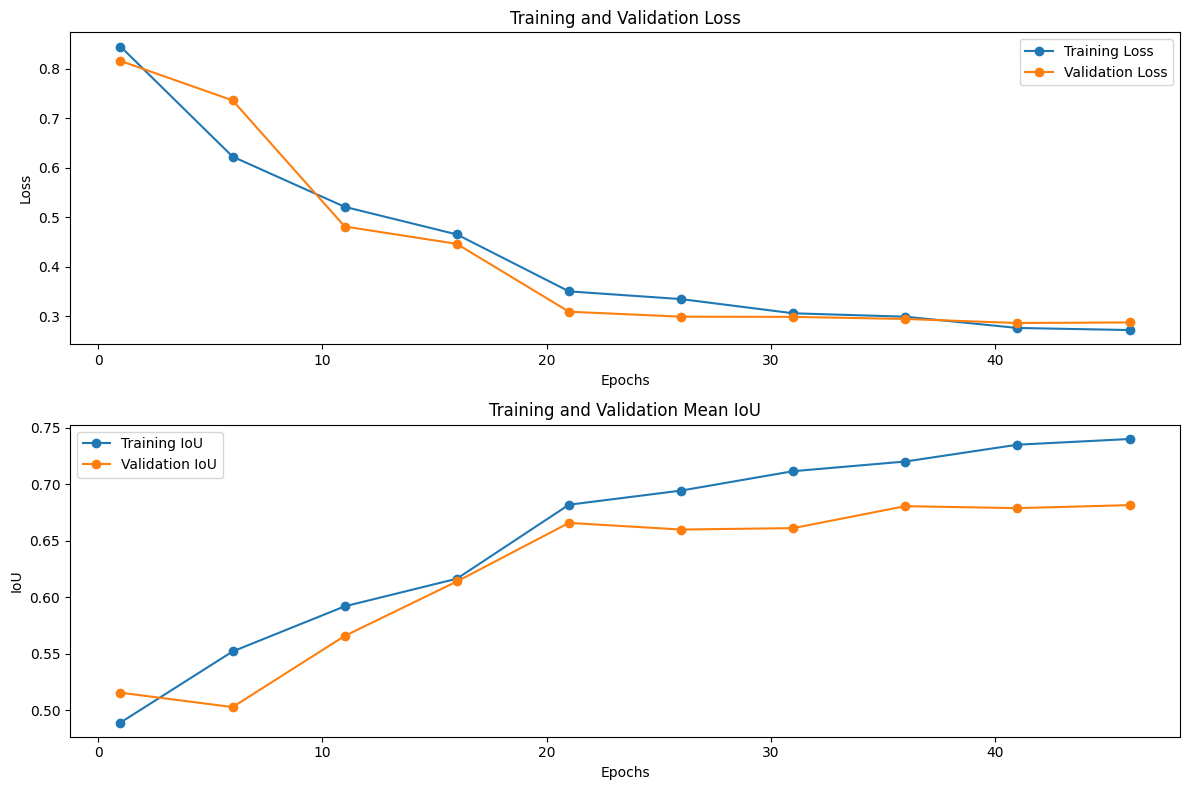

In [ ]:
if run_training:
  # Plotting the losses and IoU
  plt.figure(figsize=(12, 8))

  # Plotting Training and Validation Loss
  plt.subplot(2, 1, 1)
  plt.plot(range(1, nb_epochs+1,5), train_loss_history, label='Training Loss', marker='o')
  plt.plot(range(1, nb_epochs+1,5), val_loss_history, label='Validation Loss', marker='o')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Plotting Training and Validation Mean IoU
  plt.subplot(2, 1, 2)
  plt.plot(range(1, nb_epochs + 1, 5), train_miou_history, label='Training IoU', marker='o')
  plt.plot(range(1, nb_epochs + 1, 5), val_miou_history, label='Validation IoU', marker='o')
  plt.title('Training and Validation Mean IoU')
  plt.xlabel('Epochs')
  plt.ylabel('IoU')
  plt.legend()

  plt.tight_layout()
  plt.show()


In the first few epochs, the average loss decreases significantly while the average IoU increases a lot, indicating that the model is learning and is adjusting its weights considerably to minimize loss.

Towards the end of training, around epoch 40 onwards, the performance on the test set begins to stagnate, while the training loss continues to decrease. This indicates that the model is getting better at fitting the train set, while at the same time it is losing its ability to generalize. Therefore, there is an overfitting.

**Q11/ what should we have done to avoid overfitting?**

**please describe the curbs**

To avoid overfitting, we could increase the train set by applying transformations to the input images, such as rotations and displacements. This would increase the diversity of the training data and help the model to generalize better. However, this solution has some limitations. By increasing the train set, the training time also increases. Furthermore, if certain types of transformations are applied disproportionately, the model may learn biased patterns that are not representative of reality.

Another solution to avoid overfitting is to add regularization terms that penalize large values in the model parameters, preventing them from taking on extreme values and overfitting with the training data. However, it is necessary to choose a good value for the regularization terms. If the value is too small, it won't be enough to prevent overfitting. If the value is too large, the model becomes too simplified and can no longer segment more complex objects.

Another solution, then, is to monitor the model's performance during training. If the performance in validation stops improving, training is stopped in advance. In our case, the training would stop around epoch 38 and, thus, the network would not overfit.


In [ ]:
# Now we evaluate the model on all the test set.
loss, (iou, miou) = test(model, test_loader, criterion, metric)
print(">>>> [FINAL TEST on the test set: ] Avg. loss: ", loss ," | Mean IoU: ", miou)
# Print per class IoU on last epoch or if best iou
for key, class_iou in zip(class_encoding.keys(), iou):
  print("{0}: {1:.4f}".format(key, class_iou))

<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [FINAL TEST on the test set: ] Avg. loss:  0.6449173837900162  | Mean IoU:  0.5815192619936919
sky: 0.9138
building: 0.6818
pole: 0.1997
road_marking: 0.8984
road: 0.7093
pavement: 0.7038
tree: 0.2058
sign_symbol: 0.2108
fence: 0.7102
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan


## B. Uncertainty evaluations with MCP
Here you will just use as confidence score the Maximum class probability (MCP)


In [ ]:
m = torch.nn.Softmax2d()
batch_images, batch_labels = next(iter(test_loader)) #iter(test_loader).next()
batch_images = batch_images.cuda()
batch_labels = batch_labels.cuda()
model.eval()
with torch.no_grad():
  # Forward propagation
  outputs = model(batch_images)
  outputs0=outputs[:,0:7,:,:] # we delete the last class since we do not train on that
  outputs0_proba = m(outputs0)
  confidence, pred = outputs0_proba.max(1)



<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

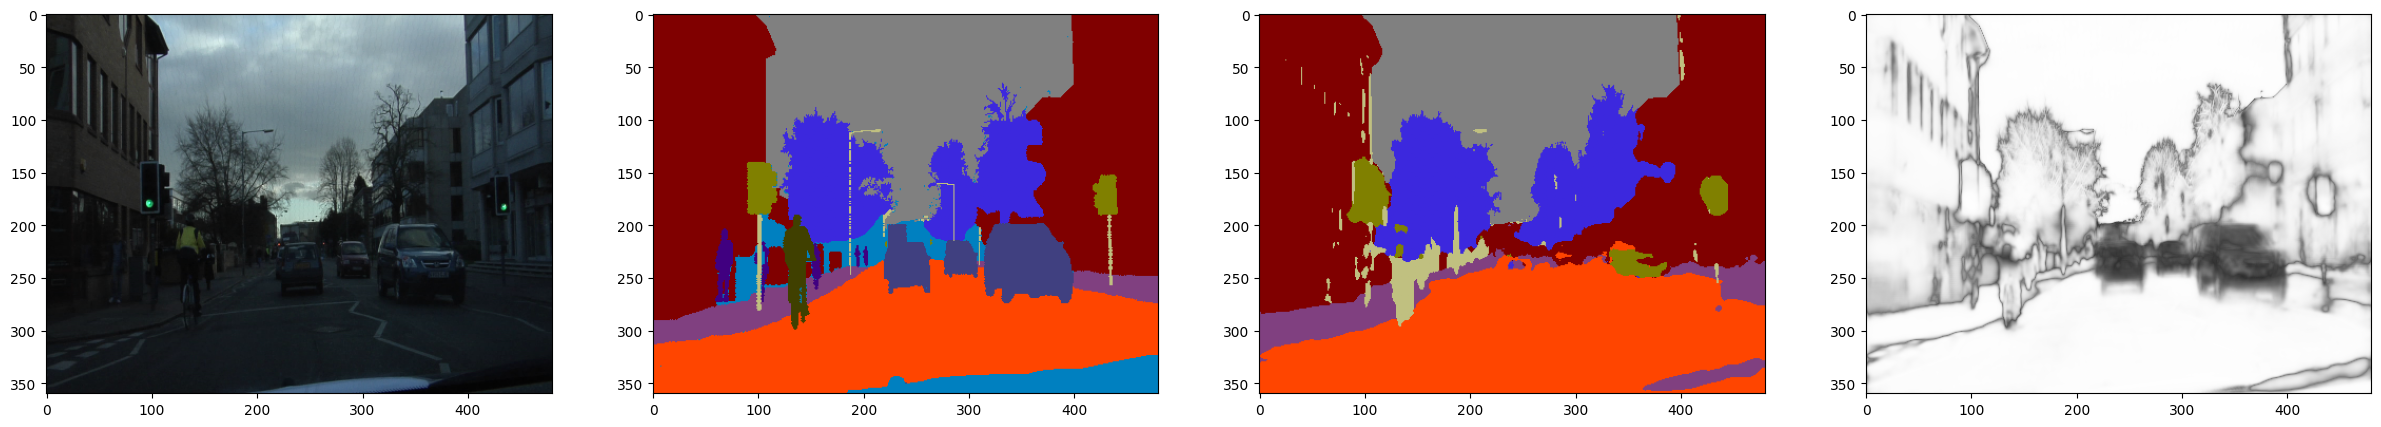

In [ ]:
img_id=0
label_to_rgb = transforms.Compose([
        LongTensorToRGBPIL(class_encoding),
        transforms.ToTensor()])
color_predictions = batch_transform(pred.cpu(), label_to_rgb)
color_batch_labels = batch_transform(batch_labels.cpu(), label_to_rgb)
image = torchvision.utils.make_grid(batch_images[img_id].cpu()).numpy()
label = torchvision.utils.make_grid(color_batch_labels[img_id]).numpy()
predictionimg = torchvision.utils.make_grid(color_predictions[img_id]).numpy()
confidenceimg = torchvision.utils.make_grid(confidence[img_id].cpu()).numpy()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 15))
ax1.imshow(np.transpose(image, (1, 2, 0)))
ax2.imshow(np.transpose(label, (1, 2, 0)))
ax3.imshow(np.transpose(predictionimg, (1, 2, 0)))
ax4.imshow(np.transpose(confidenceimg, (1, 2, 0)))
plt.show()


**Q12/ The last image is the related to the confidence score of the DNN. Can you explain why?**
**Are you happy with this image?**

The model was trained and evaluated considering all the labels. However, the labels that were disregarded when calculating the IoU metric were also deleted from the model's output figures (outputs0=outputs[:,0:7,:,:]). Thus, these labels were also disregarded in the calculation of the MCP and deleted in the predicted figure (third and forth figures above).

Therefore, the regions whose label was not taken into account in the calculation of MCP, such as car and cyclist, will have a low MCP value, since the probability of their respective label (which is the largest among all the others) was not taken into account in the calculation. In the last figure, these regions appear as blacker, i.e. with a low confidence score.

In contrast, the regions whose respective label is taken into account in the MCP calculation have a high MCP value and are whiter in the last figure.

So we're happy with the image, because it shows that the regions whose label was considered in the output have a high confidence score, while the regions whose label was not considered in the output have a low confidence score. If the regions where the label was disconsidered had a high value, it would mean that the second most likely class has a prediction wheight close to the firt one, which is very undesirable and indicates that the network is not well trained.

The last remark is that the contours of the objects have a low confidence, which is expected as it is the interface between two classes.

## C. Uncertainty evaluations with Temperature Scaling
**Q13/ please implement a temperature scaling**

In [ ]:
"""
This code is based on or includes components from the project Temperature Scaling, which is licensed under the MIT License.

MIT License:

Copyright (c) 2017 Geoff Pleiss

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
"""

class Temperature(nn.Module):
    """
    A thin decorator, which wraps a model with temperature scaling
    model (nn.Module):
        A classification neural network
        NB: Output of the neural network should be the classification logits,
            NOT the softmax (or log softmax)!
    """
    def __init__(self, model):
        super(Temperature, self).__init__()
        self.model = model
        self.temperature = nn.Parameter(torch.ones(1) * 1.5)
        self.avg_confidence_in_bin = []
        self.avg2_confidence_in_bin = []
        self.accuracy_in_bin = []
        self.accuracy2_in_bin = []

    def forward(self, input):
        logits = self.model(input)
        return self.temperature_scale(logits)

    def temperature_scale(self, logits):
        """
        Perform temperature scaling on logits
        """
        # Expand temperature to match the size of logits
        #temperature = self.temperature.unsqueeze(1).expand(logits.size(0), logits.size(1))
        #temperature = self.temperature.unsqueeze(2).unsqueeze(3).expand(logits.size())
        temperature = self.temperature.unsqueeze(-1).unsqueeze(-1).expand(logits.size())
        return logits / temperature

    # This function probably should live outside of this class, but whatever
    def set_temperature(self, valid_loader):
        """
        Tune the tempearature of the model (using the validation set).
        We're going to set it to optimize NLL.
        valid_loader (DataLoader): validation set loader
        """
        self.cuda()
        nll_criterion = nn.CrossEntropyLoss().cuda()
        ece_criterion = _ECELoss().cuda()



        # First: collect all the logits and labels for the validation set
        logits_list = []
        labels_list = []
        with torch.no_grad():
            for input, label in valid_loader:
                input = input.cuda()
                logits = self.model(input)
                logits_list.append(logits)
                labels_list.append(label)
            logits = torch.cat(logits_list).cuda()
            labels = torch.cat(labels_list).cuda()

        # Calculate NLL and ECE before temperature scaling
        before_temperature_nll = nll_criterion(logits, labels).item()
        before_temperature_ece = ece_criterion(logits, labels)[0].item()
        print('Before temperature - NLL: %.3f, ECE: %.3f' % (before_temperature_nll, before_temperature_ece))
        self.avg_confidence_in_bin = ece_criterion(logits, labels)[1]
        self.accuracy_in_bin = ece_criterion(logits, labels)[2]


        # Next: optimize the temperature w.r.t. NLL
        optimizer = optim.LBFGS([self.temperature], lr=0.01, max_iter=50)

        def eval():
            optimizer.zero_grad()
            loss = nll_criterion(self.temperature_scale(logits), labels)
            loss.backward()
            return loss
        optimizer.step(eval)

        # Calculate NLL and ECE after temperature scaling
        after_temperature_nll = nll_criterion(self.temperature_scale(logits), labels).item()
        after_temperature_ece = ece_criterion(self.temperature_scale(logits), labels)[0].item()
        print('Optimal temperature: %.3f' % self.temperature.item())
        print('After temperature - NLL: %.3f, ECE: %.3f' % (after_temperature_nll, after_temperature_ece))
        self.avg2_confidence_in_bin = ece_criterion(self.temperature_scale(logits), labels)[1]
        self.accuracy2_in_bin = ece_criterion(self.temperature_scale(logits), labels)[2]

        return self


class _ECELoss(nn.Module):
    """
    Calculates the Expected Calibration Error of a model.
    (This isn't necessary for temperature scaling, just a cool metric).

    The input to this loss is the logits of a model, NOT the softmax scores.

    This divides the confidence outputs into equally-sized interval bins.
    In each bin, we compute the confidence gap:

    bin_gap = | avg_confidence_in_bin - accuracy_in_bin |

    We then return a weighted average of the gaps, based on the number
    of samples in each bin

    See: Naeini, Mahdi Pakdaman, Gregory F. Cooper, and Milos Hauskrecht.
    "Obtaining Well Calibrated Probabilities Using Bayesian Binning." AAAI.
    2015.
    """
    def __init__(self, n_bins=15):
        """
        n_bins (int): number of confidence interval bins
        """
        super(_ECELoss, self).__init__()
        bin_boundaries = torch.linspace(0, 1, n_bins + 1)
        self.bin_lowers = bin_boundaries[:-1]
        self.bin_uppers = bin_boundaries[1:]

    def forward(self, logits, labels):
        softmaxes = F.softmax(logits, dim=1)
        confidences, predictions = torch.max(softmaxes, 1)
        accuracies = predictions.eq(labels)

        avg_confidence_values = []
        accuracy_values = []
        ece = torch.zeros(1, device=logits.device)
        for bin_lower, bin_upper in zip(self.bin_lowers, self.bin_uppers):
            # Calculated |confidence - accuracy| in each bin
            in_bin = confidences.gt(bin_lower.item()) * confidences.le(bin_upper.item())
            prop_in_bin = in_bin.float().mean()
            if prop_in_bin.item() > 0:
                accuracy_in_bin = accuracies[in_bin].float().mean()
                avg_confidence_in_bin = confidences[in_bin].mean()
                ece += torch.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin
                avg_confidence_values.append(avg_confidence_in_bin.item())
                accuracy_values.append(accuracy_in_bin.item())

        return ece, avg_confidence_values, accuracy_values

<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

Before temperature - NLL: 0.718, ECE: 0.028
Optimal temperature: 1.417
After temperature - NLL: 0.678, ECE: 0.067
Done!


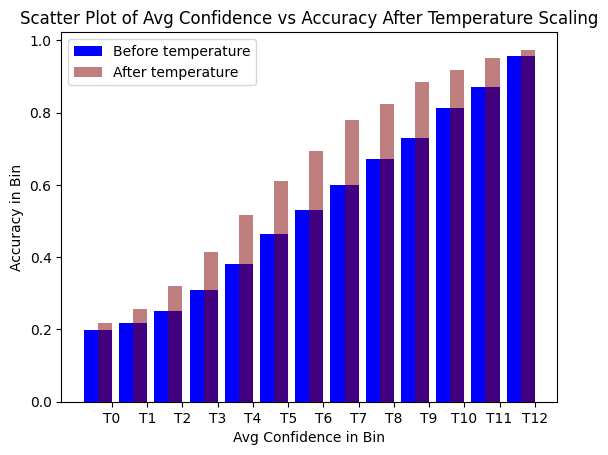

In [ ]:
model = UNet(num_classes)
model.load_state_dict(torch.load('/drive/MyDrive/Colab Notebooks/IA323/models/unet_model.pth'))

scaled_model = Temperature(model)
scaled_model.set_temperature(val_loader)

avg2_confidence_in_bin = scaled_model.avg2_confidence_in_bin
avg_confidence_in_bin = scaled_model.avg_confidence_in_bin
accuracy2_in_bin = scaled_model.accuracy2_in_bin
accuracy_in_bin = scaled_model.accuracy_in_bin

#model_filename = os.path.join('/drive/MyDrive/Colab Notebooks/IA323/models/temp', 'model_with_temperature.pth')
#torch.save(model.state_dict(), model_filename)
#print('Temperature scaled model sved to %s' % model_filename)
print('Done!')

Graph = False
while Graph==False:
# creating the bar plot
  if len(accuracy2_in_bin) == len(accuracy_in_bin):

    width = 0.8
    indices = np.arange(len(avg_confidence_in_bin))
    plt.bar(indices, accuracy_in_bin, width=width, color='blue', label='Before temperature')
    plt.bar([i+0.25*width for i in indices], accuracy2_in_bin, width=0.5*width, color='maroon', alpha=0.5, label='After temperature')

    plt.xticks(indices+width/2., ['T{}'.format(i) for i in range(len(avg_confidence_in_bin))])

    plt.legend()
    plt.xlabel('Avg Confidence in Bin')
    plt.ylabel('Accuracy in Bin')
    plt.title('Scatter Plot of Avg Confidence vs Accuracy After Temperature Scaling')
    plt.show()
    Graph = True

  else:

    min_len = len(accuracy_in_bin)
    avg2_confidence_in_bin = avg2_confidence_in_bin[1:]
    accuracy2_in_bin = accuracy2_in_bin[1:]


**The results of the temperature scaling:**

The "before temperature" and "after temperature" refer to the temperature scaling process applied to the logits of a neural network before and after calibration, respectively.

"Before temperature" refers to the initial temperature parameter T used in the temperature scaling process. This initial temperature is applied to the logits of the neural network to "soften" the softmax outputs, effectively adjusting the confidence scores associated with the predictions. A higher before temperature T > 1 raises the output entropy, leading to a more uncertain prediction, while a lower T < 1 results in a more confident prediction .

"After temperature" is the optimized temperature parameter T obtained through calibration to improve the calibration of the model's predictions. This optimized temperature is determined with respect to the negative log-likelihood (NLL) on the validation set. The after temperature T is used to recalibrate the confidence scores of the model's predictions, ensuring that the recalibrated confidence estimates are well-calibrated and representative of true probabilities.

## D. Uncertainty evaluations with MC Dropout

Let us implement **MC dropout**. This technique decribed in [this paper](https://arxiv.org/abs/1506.02142) allow us to have a better confindence score by using the dropout during test time.



**Q\14 Please implement MC Dropout.**

In [ ]:
def mc_dropout(batch_images, batch_labels):
  torch.cuda.empty_cache()
  m = torch.nn.Softmax2d()
  model.train()

  num_samples = 50

  with torch.no_grad():
      all_outputs = [model(batch_images)[:,0:7,:,:] for i in range(num_samples)]
      all_outputs = torch.stack(all_outputs)

      confidence, votes = all_outputs.max(2)

      # Get final_pred (most voted class for each pixel for each image)
      votes_flattened = votes.view(num_samples, batch_size, -1)  # Reshape to [50, 10, 360*480]
      final_pred_values, _ = votes_flattened.mode(dim=0)  # Get the most voted class
      final_pred = final_pred_values.view(batch_size, 360, 480)  # Reshape back to [10, 360, 480]

      # Get confidence index (proportion of votes for the most-voted class)
      most_voted_mask = (votes == final_pred.unsqueeze(0))  # Create a mask for most voted class
      confidence_index = most_voted_mask.float().mean(dim=0)  # Calculate mean along the votes dimension]



  return final_pred, confidence_index, all_outputs



In [ ]:
batch_images, batch_labels = next(iter(test_loader)) #iter(test_loader).next()
batch_images = batch_images.cuda()
batch_labels = batch_labels.cuda()
pred, confidence_mcDropout, _ = mc_dropout(batch_images, batch_labels)

<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

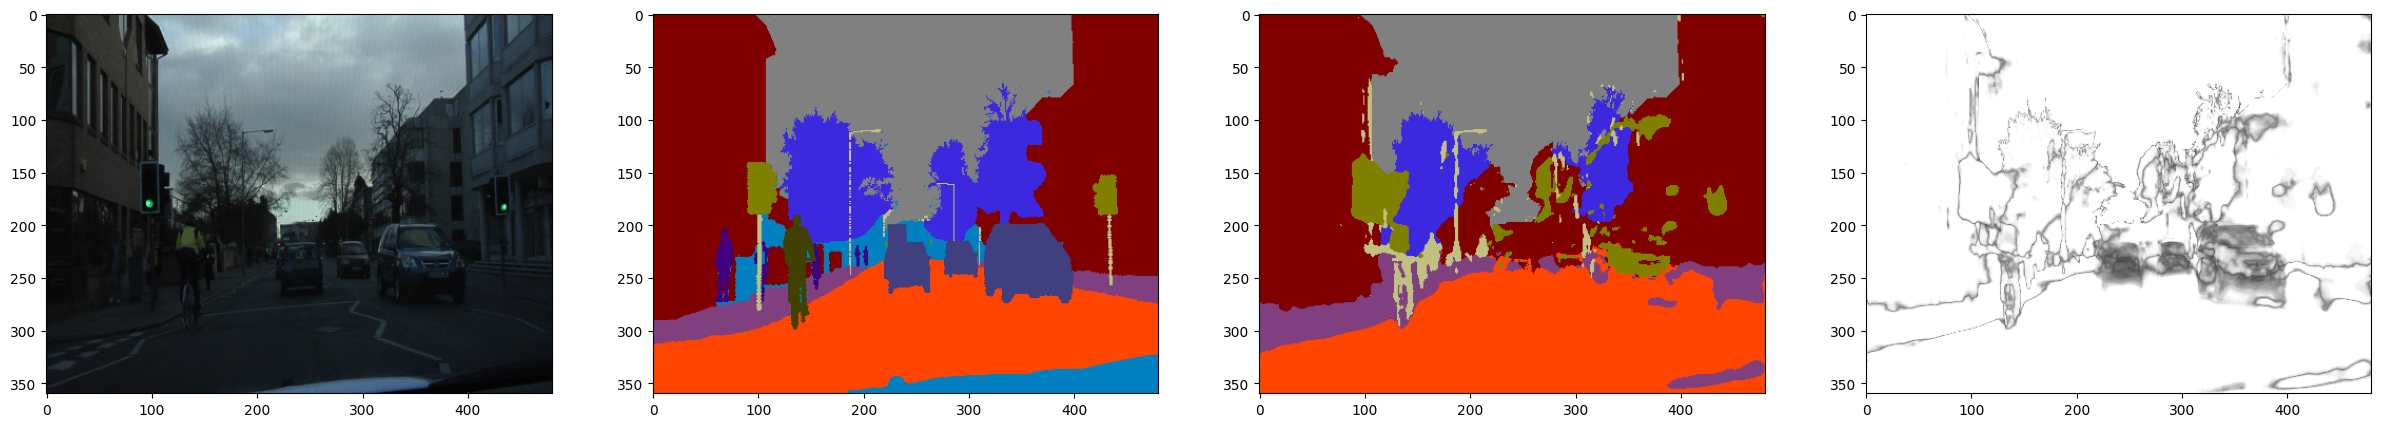

In [ ]:
img_id=0
label_to_rgb = transforms.Compose([
        LongTensorToRGBPIL(class_encoding),
        transforms.ToTensor()])
color_predictions = batch_transform(pred.cpu(), label_to_rgb)
color_batch_labels = batch_transform(batch_labels.cpu(), label_to_rgb)
image = torchvision.utils.make_grid(batch_images[img_id].cpu()).numpy()
label = torchvision.utils.make_grid(color_batch_labels[img_id]).numpy()
predictionimg = torchvision.utils.make_grid(color_predictions[img_id]).numpy()
confidenceimg = torchvision.utils.make_grid(confidence_mcDropout[img_id].cpu()).numpy()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 15))
ax1.imshow(np.transpose(image, (1, 2, 0)))
ax2.imshow(np.transpose(label, (1, 2, 0)))
ax3.imshow(np.transpose(predictionimg, (1, 2, 0)))
ax4.imshow(np.transpose(confidenceimg, (1, 2, 0)))
plt.show()

## E. Uncertainty evaluations with Deep Ensembles
**Q\15 Please implement [Deep Ensembles](https://papers.nips.cc/paper/2017/file/9ef2ed4b7fd2c810847ffa5fa85bce38-Paper.pdf).** (Regression or classification ? ) Here it is classification!


1.   You need to train 3 DNNs and save it. On the next block I show you how to save and load a CNN.
2.   You need to rewrite the test function to perform Deep ensembles



Please train more models and save them on model1 and model2.

Firstly we need the dataloader to be on shuffle=true (already is) as per recommendation of the article, the different neural twin networks will be trained on the same dataset but on different order and with different initial weights to (hopefully) arrive to a more robust result. The weights are already reandomly  initialized in pytorch so no need to change anything regarding this. Lastly the criterion needs to be "proper", which means the function needs to follow certain criteria. Fortunately our softmax cross entropy loss already follows this criteria as per described in the paper.

Since we did not need to change anything in the model itself, we'll use the already trained model as the first one and train 2 others.


In [ ]:
run_training = False
N_networks = 2

if run_training:
  for i in range(1,N_networks+1):
    torch.cuda.empty_cache()
    print("\nTraining model {n:d}\n".format(n=i))
    num_classes = len(class_encoding)
    # Intialize UNet
    model = UNet(num_classes).cuda()

    # We are going to use the CrossEntropyLoss loss function as it's most
    # frequentely used in classification problems with multiple classes which
    # fits the problem. This criterion  combines LogSoftMax and NLLLoss.
    criterion = nn.CrossEntropyLoss(weight=class_weights)

    # We build the optimizer
    optimizer = optim.Adam(
            model.parameters(),
            lr=learning_rate,
            weight_decay=weight_decay)

    # Learning rate decay scheduler
    lr_updater = lr_scheduler.StepLR(optimizer, lr_decay_epochs,
                                        lr_decay)

    # Evaluation metric
    ignore_index=[]
    ignore_index0 = list(class_encoding).index('unlabeled')
    ignore_index.append(ignore_index0)
    ignore_index0 = list(class_encoding).index('pedestrian')
    ignore_index.append(ignore_index0)
    ignore_index0 = list(class_encoding).index('bicyclist')
    ignore_index.append(ignore_index0)
    ignore_index0 = list(class_encoding).index('car')
    ignore_index.append(ignore_index0)

    metric = IoU(num_classes, ignore_index=ignore_index)

    # Start Training
    best_miou = 0
    train_loss_history = []
    val_loss_history = []
    train_miou_history = []
    val_miou_history = []
    for epoch in range( nb_epochs):
      print(">>>> [Epoch: {0:d}] Training".format(epoch))

      epoch_loss, (iou, miou) = train( model, train_loader, optimizer, criterion, metric)
      lr_updater.step()
      print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, epoch_loss, miou))
      train_miou=miou
      train_loss=epoch_loss
      if (epoch + 1) % 5 == 0 or epoch + 1 == nb_epochs:

        print(">>>> [Epoch: {0:d}] Validation".format(epoch))
        loss, (iou, miou) = test(model, val_loader, criterion, metric)
        print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, loss, miou))
        train_loss_history.append(train_loss)
        val_loss_history.append(loss)
        train_miou_history.append(train_miou)
        val_miou_history.append(miou)
        # Print per class IoU on last epoch or if best iou
        if epoch + 1 == nb_epochs or miou > best_miou:
          for key, class_iou in zip(class_encoding.keys(), iou):
            print("{0}: {1:.4f}".format(key, class_iou))

    # save model
    torch.save(model.state_dict(), '/drive/MyDrive/Colab Notebooks/IA323/models/unet_model{n:d}.pth'.format(n=i))

torch.cuda.empty_cache()

In [ ]:
# load models
device = torch.device("cuda")
model0 = UNet(num_classes)
model0.load_state_dict(torch.load('/drive/MyDrive/Colab Notebooks/IA323/models/unet_model.pth'))
model0.to(device)
model0.eval()

model1 = UNet(num_classes)
model1.load_state_dict(torch.load('/drive/MyDrive/Colab Notebooks/IA323/models/unet_model1.pth'))
model1.to(device)
model1.eval()

model2 = UNet(num_classes)
model2.load_state_dict(torch.load('/drive/MyDrive/Colab Notebooks/IA323/models/unet_model2.pth'))
model2.to(device)
model2.eval()

UNet(
  (inc): inconv(
    (conv): double_conv(
      (conv): Sequential(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
  )
  (down1): down(
    (mpconv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): double_conv(
        (conv): Sequential(
          (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(64

In [ ]:
def test_deep_ensemble(models, data_loader, criterion, metric, iteration_loss=False):
    for model in models:
      model.eval()
    epoch_loss = 0.0
    metric.reset()
    for step, batch_data in enumerate(data_loader):
      # Get the inputs and labels
      inputs = batch_data[0].cuda()
      labels = batch_data[1].cuda()

      # evaluates for each model in ensemble
      outputs_glob_batch = []
      for i in range(len(models)):
        with torch.no_grad():
          # Forward propagation
          outputs_glob_batch.append(models[i](inputs))

          # Loss computation
          loss = criterion(outputs_glob_batch[i], labels)

        # Keep track of loss for current epoch
        epoch_loss += loss.item()

      outputs_glob_batch = torch.stack(outputs_glob_batch) #???
      outputs = torch.mean(outputs_glob_batch,dim=0)

      # Keep track of evaluation the metric
      metric.add(outputs.detach(), labels.detach())

      if iteration_loss:
          print("[Step: %d] Iteration loss: %.4f" % (step, loss.item()))

    return epoch_loss / (len(data_loader) * len(models)), metric.value()

In [ ]:
# Now we evaluate the model on all the test set.
models = [model0,model1,model2]
loss, (iou, miou) = test_deep_ensemble(models, test_loader, criterion, metric)
print(">>>> [FINAL TEST on the test set: ] Avg. loss: ", loss ," | Mean IoU: ", miou)
# Print per class IoU on last epoch or if best iou
for key, class_iou in zip(class_encoding.keys(), iou):
  print("{0}: {1:.4f}".format(key, class_iou))

<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

>>>> [FINAL TEST on the test set: ] Avg. loss:  0.626887536711163  | Mean IoU:  0.601309533720932
sky: 0.9221
building: 0.7063
pole: 0.2234
road_marking: 0.9115
road: 0.7345
pavement: 0.7208
tree: 0.2279
sign_symbol: 0.2256
fence: 0.7397
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

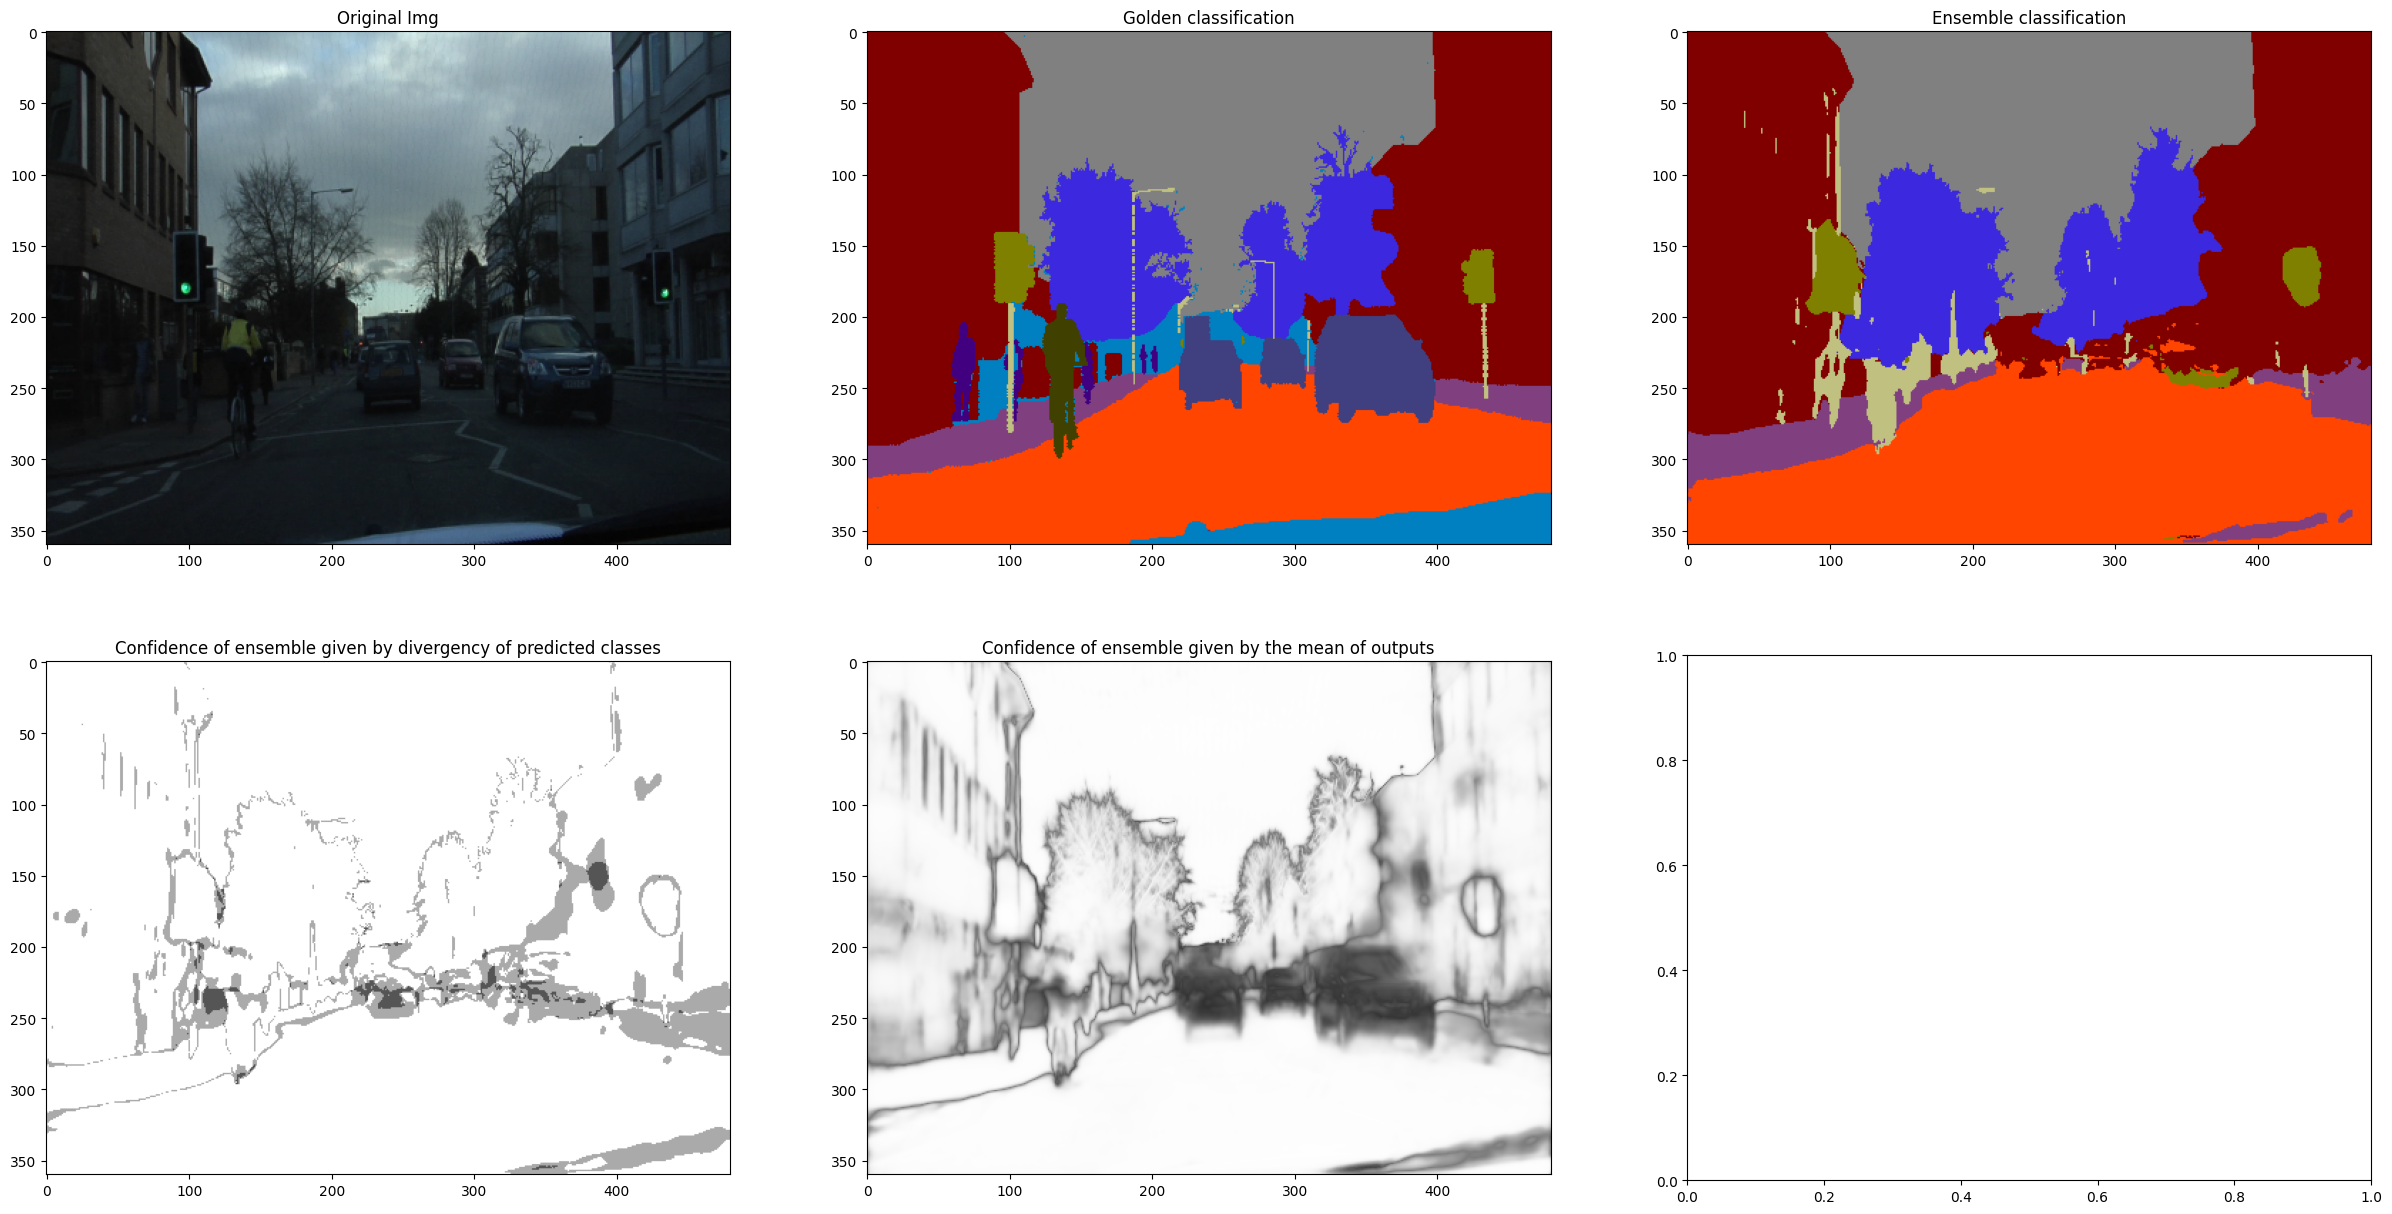

In [ ]:
m = torch.nn.Softmax2d()
batch_images, batch_labels = next(iter(test_loader)) #iter(test_loader).next()
batch_images = batch_images.cuda()
batch_labels = batch_labels.cuda()

def deep_ensemble (batch_images, batch_labels):
  for model in models:
    model.eval()
  with torch.no_grad():
    # Forward propagation for all models and result combine
    outputs_glob_batch = []
    for i in range(len(models)):
      outputs = models[i](batch_images)
      outputs0=outputs[:,0:7,:,:] # we delete the last class since we do not train on that
      outputs0_proba = m(outputs0)
      outputs_glob_batch.append(outputs0_proba)

    outputs_glob_batch = torch.stack(outputs_glob_batch)
    outputs = torch.mean(outputs_glob_batch,dim=0)
    mean_confidences, pred = outputs.max(1)

    _, votes = outputs_glob_batch.max(2)

    # Get final_pred (most voted class for each pixel for each image)
    votes_flattened = votes.view(3, batch_size, -1)  # Reshape to [50, 10, 360*480]
    final_pred_values, _ = votes_flattened.mode(dim=0)  # Get the most voted class
    final_pred = final_pred_values.view(batch_size, 360, 480)  # Reshape back to [10, 360, 480]

    # Get confidence index (proportion of votes for the most-voted class)
    most_voted_mask = (votes == final_pred.unsqueeze(0))  # Create a mask for most voted class
    confidence_index_vote = most_voted_mask.float().mean(dim=0)  # Calculate mean along the votes dimension]


    return final_pred, confidence_index_vote, mean_confidences, outputs_glob_batch


pred, confidence_index_vote, mean_confidences, _ = deep_ensemble(batch_images, batch_labels)


img_id=0
label_to_rgb = transforms.Compose([
        LongTensorToRGBPIL(class_encoding),
        transforms.ToTensor()])
color_predictions = batch_transform(pred.cpu(), label_to_rgb)
color_batch_labels = batch_transform(batch_labels.cpu(), label_to_rgb)
image = torchvision.utils.make_grid(batch_images[img_id].cpu()).numpy()
label = torchvision.utils.make_grid(color_batch_labels[img_id]).numpy()
predictionimg = torchvision.utils.make_grid(color_predictions[img_id]).numpy()
confidence_index_voteimg = torchvision.utils.make_grid(confidence_index_vote[img_id].cpu()).numpy()
mean_confidencesimg = torchvision.utils.make_grid(mean_confidences[img_id].cpu()).numpy()

fig, axs = plt.subplots(2, 3, figsize=(30, 15))
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[0, 2]
ax4 = axs[1, 0]
ax5 = axs[1, 1]
ax6 = axs[1, 2]
ax1.imshow(np.transpose(image, (1, 2, 0)))
ax1.title.set_text('Original Img')
ax2.imshow(np.transpose(label, (1, 2, 0)))
ax2.title.set_text('Golden classification')
ax3.imshow(np.transpose(predictionimg, (1, 2, 0)))
ax3.title.set_text('Ensemble classification')
ax4.imshow(np.transpose(confidence_index_voteimg, (1, 2, 0)))
ax4.title.set_text('Confidence of ensemble given by divergency of predicted classes')
ax5.imshow(np.transpose(mean_confidencesimg, (1, 2, 0)))
ax5.title.set_text('Confidence of ensemble given by the mean of outputs')
plt.show()


The average loss and IoU of the ensemble in very similar to that of the separetyle trained model. This is expected as the three models are really three variations of the same, so they should converge to a close performance.

After a discussion with Emanuel Aldea, we've arrived in two possible alternatives to fusion the data given by the three networks, we either take the mean of the predictions or the vote of the higher value predicted class. The vote method was chosen after much discussion because the mean can hide other factors, such as: a second higher classified class can have a higher mean than two highs and a low output. The Confidence of the ensemble was also classified in these two different ways. We can see from the image that in general both agree in the objets borders and around the cars. But they anyhow differ in some important ways. As in the vote method all the networks get the class of the car wrong (afterall the right class is not anymore a part of the possibilities), they think they are right, high confidence, when actually is is possible to see fro the mean that they are wrong. The vote method seems to be very compatible to the mean method whrn the mean confidence is very low.

## F. Analysis and conclusions

**\Q16 inspired by this [paper](https://arxiv.org/abs/1912.02757) propose a way to study the diversity of MC dropout and Deep Ensembles**

In [ ]:
# Calculate diversity between the predictions of one image
def calculate_mean_var_diversity(all_preds):
  n_pred = len(all_preds)

  diversity_score = [[0] * n_pred for _ in range(n_pred)]

  for i in range(n_pred):
    for j in range(i + 1, n_pred):
      diff = all_preds[i] - all_preds[j]
      diff_mask = (diff != 0).float()
      diversity_image = torch.sum(diff_mask) / (diff_mask.size(0) * diff_mask.size(1))
      diversity_score[i][j] = diversity_image.item()
      diversity_score[j][i] = diversity_image.item()

  # Calculate the average of the diversity scores (disregarding the main diagonal)
  diversity_vet = [element for line in diversity_score for element in line]
  mean_diversity = sum(diversity_vet) / (len(diversity_vet) - n_pred)

  # Calculate the variance of the diversity scores (disregarding the main diagonal)
  var_diversity = 0
  for i in range(n_pred):
    for j in range(n_pred):
      if i != j:
        var_diversity += (diversity_score[i][j] - mean_diversity)**2
  var_diversity = var_diversity / (n_pred*n_pred - n_pred)

  return mean_diversity, var_diversity

In [ ]:
def plot_mean_diversity(mean_mcDropout, mean_deepEnsembles):
  # Plot average of diversity score
  method = ['MC Dropout', 'Deep Ensembles']
  mean_diversity = [mean_mcDropout, mean_deepEnsembles]

  bars = plt.bar(method, mean_diversity, color=['blue', 'orange'])
  plt.xlabel('Method')
  plt.ylabel('Average of diversity score')

  for bar, value in zip(bars, mean_diversity):
      plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(round(value, 3)), ha='center', va='bottom')

  plt.show()

def plot_var_diversity(var_mcDropout, var_deepEnsembles):
  # Plot variance of diversity score
  method = ['MC Dropout', 'Deep Ensembles']
  var_diversity = [var_mcDropout, var_deepEnsembles]

  bars = plt.bar(method, var_diversity, color=['blue', 'orange'])
  plt.xlabel('Method')
  plt.ylabel('Variance of diversity score')

  plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

  for bar, value in zip(bars, var_diversity):
      plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(round(value*10000, 3)), ha='center', va='bottom')

  plt.show()

In [ ]:
# Write the code
batch_images, batch_labels = next(iter(test_loader)) #iter(test_loader).next()
batch_images = batch_images.cuda()
batch_labels = batch_labels.cuda()

# Calculate all the preds in the MC Dropout method
all_preds_mcDropout = []
_, _, all_outputs_mcdropout = mc_dropout(batch_images, batch_labels)
for i in range(len(all_outputs_mcdropout)):
  _, pred = all_outputs_mcdropout[i].max(1)
  all_preds_mcDropout.append(pred[0])

# Calculate the preds of the 3 DNNs in Deep Ensemble method
all_preds_deepEnsemble = []
_, _, _, all_outputs_deepEnsemble = deep_ensemble(batch_images, batch_labels)
for i in range(all_outputs_deepEnsemble.size(0)):
  _, pred = all_outputs_deepEnsemble[i].max(1)
  all_preds_deepEnsemble.append(pred[0])


<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
<ipython-input-14-61300d7000f8>:177: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using stor

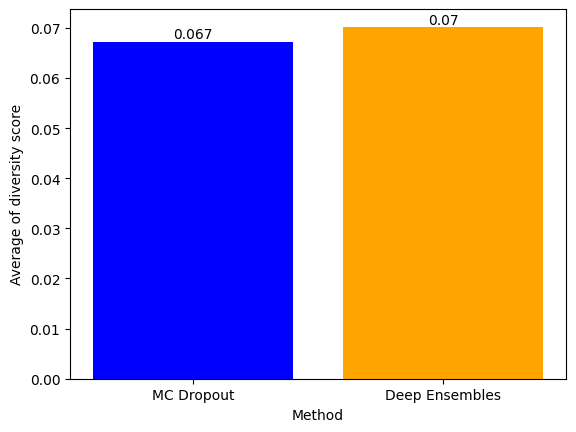

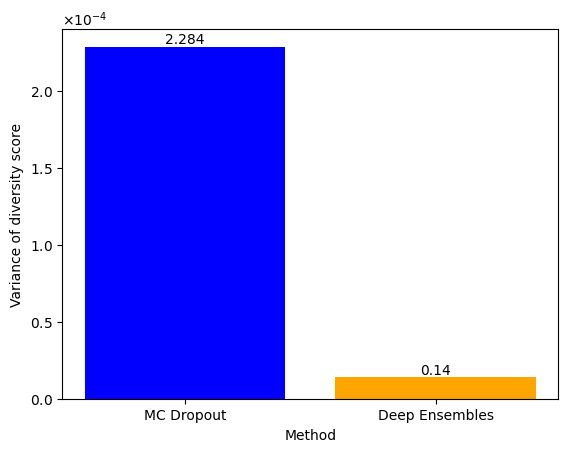

In [ ]:
mean_diversity_mcDropout, var_diversity_mcDropout = calculate_mean_var_diversity(all_preds_mcDropout)
mean_diversity_deepEnsemble, var_diversity_deepEnsemble = calculate_mean_var_diversity(all_preds_deepEnsemble)

# Plot average of diversity score
plot_mean_diversity(mean_diversity_mcDropout, mean_diversity_deepEnsemble)

# Plot variance of diversity score
plot_var_diversity(var_diversity_mcDropout, var_diversity_deepEnsemble)

**\Q17 Propose a last code to quantify epistemic uncertainty of a DNN**
For exemple you can use [OVNNI](https://arxiv.org/abs/2006.00954)


In [ ]:
# Write the code .

**BONUS find a way to eveluate if the uncertainty is correct**

**Write a conclusions**

From the results obtained in the MCP, Temperature Scaling, MC Dropout and Deep Ensembles methods, we can draw some conclusions.

The temperature scaling tried to better quantify the uncertanty of the network, and although it was improved, the result is still not suficiently good.

In MC Dropout, to obtain the prediction of the 50 outputs, we considered the average of the outputs. However, after a discussion with our Data Fusion professor, Mr. Emanuel Aldea, we understand that the best thing to do would be to get the most voted class for each pixel of each image. Confidence was therefore calculated from the percentage of those votes which agree with the label.

As we can see in MC Dropout, the confidence increases, especially at the edges of the objects. We can therefore conclude that MC Dropout does in fact obtain a better confidence score than MCP, which is expected, as we try to take out of the equation the aleatory uncertanty.

The Deep Ensembles method, on the other hand, obtains an uncertainty similar to that of MC Dropout. However, it is possible to notice that in Deep Ensemble, the confidence score increases more at the edges, which emphasizes that this method has an even better confidence score.

Comparing the diversity score of both methods (MC Dropout and Deep Ensembles), we can see that the diversity of MC Dropout is approximately equal to the diversity of Deep Ensemble. On the other hand, the variance of the Deep Ensemble diversity is much lower than that of MC Dropout, because while in MC Dropout we make 50 predictions, in Deep Ensemble we make only 3, even though they are from different models.

In summary, we think that the DeepEnsembles method is the overall best, even given the price of training more networks.